## Har Har Mahadev

In [2]:
# Import necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, accuracy_score
from xgboost import XGBClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
import scipy.stats as stats
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.feature_selection import RFE
import itertools
from xgboost import XGBClassifier
from tabulate import tabulate

In [43]:
# Load the dataset (replace 'your_dataset.csv' with the actual file path)
data = pd.read_csv('Friday-WorkingHours-Afternoon-PortScan.pcap_ISCX.csv')

# Display the first few rows of the dataset to understand its structure
data.head()


Destination Port   Flow Duration   Total Fwd Packets  \
0                 22         1266342                  41   
1                 22         1319353                  41   
2                 22             160                   1   
3                 22         1303488                  41   
4              35396              77                   1   

    Total Backward Packets  Total Length of Fwd Packets  \
0                       44                         2664   
1                       44                         2664   
2                        1                            0   
3                       42                         2728   
4                        2                            0   

    Total Length of Bwd Packets   Fwd Packet Length Max  \
0                          6954                     456   
1                          6954                     456   
2                             0                       0   
3                          6634                     456   
4                             0                       0   

    Fwd Packet Length Min   Fwd Packet Length Mean   Fwd Packet Length Std  \
0                       0                64.975610              109.864573   
1                       0                64.975610              109.864573   
2                       0                 0.000000                0.000000   
3                       0                66.536585              110.129945   
4                       0                 0.000000                0.000000   

   ...   min_seg_size_forward  Active Mean   Active Std   Active Max  \
0  ...                     32          0.0          0.0            0   
1  ...                     32          0.0          0.0            0   
2  ...                     32          0.0          0.0            0   
3  ...                     32          0.0          0.0            0   
4  ...                     32          0.0          0.0            0   

    Active Min  Idle Mean   Idle Std   Idle Max   Idle Min   Label  
0            0        0.0        0.0          0          0  BENIGN  
1            0        0.0        0.0          0          0  BENIGN  
2            0        0.0        0.0          0          0  BENIGN  
3            0        0.0        0.0          0          0  BENIGN  
4            0        0.0        0.0          0          0  BENIGN  

[5 rows x 79 columns]

In [44]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286467 entries, 0 to 286466
Data columns (total 79 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0    Destination Port             286467 non-null  int64  
 1    Flow Duration                286467 non-null  int64  
 2    Total Fwd Packets            286467 non-null  int64  
 3    Total Backward Packets       286467 non-null  int64  
 4   Total Length of Fwd Packets   286467 non-null  int64  
 5    Total Length of Bwd Packets  286467 non-null  int64  
 6    Fwd Packet Length Max        286467 non-null  int64  
 7    Fwd Packet Length Min        286467 non-null  int64  
 8    Fwd Packet Length Mean       286467 non-null  float64
 9    Fwd Packet Length Std        286467 non-null  float64
 10  Bwd Packet Length Max         286467 non-null  int64  
 11   Bwd Packet Length Min        286467 non-null  int64  
 12   Bwd Packet Length Mean       286467 non-nul

In [45]:
data.nunique()

 Destination Port              14495
 Flow Duration                 64077
 Total Fwd Packets               384
 Total Backward Packets          486
Total Length of Fwd Packets     5326
                               ...  
Idle Mean                      11147
 Idle Std                      13350
 Idle Max                       6300
 Idle Min                      13008
 Label                             2
Length: 79, dtype: int64

## Null Values Check

In [48]:
#handle missing value
# Adjust pandas settings to display all columns
pd.set_option('display.max_rows', None)

# Check and print missing values for all columns
missing_values = data.isnull().sum()
print("Missing values in each column:")
print(missing_values)

# Optionally reset the pandas display setting
pd.reset_option('display.max_rows')


Missing values in each column:
 Destination Port                0
 Flow Duration                   0
 Total Fwd Packets               0
 Total Backward Packets          0
Total Length of Fwd Packets      0
 Total Length of Bwd Packets     0
 Fwd Packet Length Max           0
 Fwd Packet Length Min           0
 Fwd Packet Length Mean          0
 Fwd Packet Length Std           0
Bwd Packet Length Max            0
 Bwd Packet Length Min           0
 Bwd Packet Length Mean          0
 Bwd Packet Length Std           0
Flow Bytes/s                    15
 Flow Packets/s                  0
 Flow IAT Mean                   0
 Flow IAT Std                    0
 Flow IAT Max                    0
 Flow IAT Min                    0
Fwd IAT Total                    0
 Fwd IAT Mean                    0
 Fwd IAT Std                     0
 Fwd IAT Max                     0
 Fwd IAT Min                     0
Bwd IAT Total                    0
 Bwd IAT Mean                    0
 Bwd IAT Std            

### Replace Null values with avg

In [53]:
data.loc[:, 'Flow Bytes/s'] = data['Flow Bytes/s'].fillna(data['Flow Bytes/s'].mean())

In [55]:
import numpy as np

# Check for NaN or infinity in the dataset
print("NaN values in dataset:", np.isnan(X).any())
print("Infinity values in dataset:", np.isinf(X).any())


NaN values in dataset:  Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
 Active Min                    False
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
Length: 78, dtype: bool
Infinity values in dataset:  Destination Port              False
 Flow Duration                 False
 Total Fwd Packets             False
 Total Backward Packets        False
Total Length of Fwd Packets    False
                               ...  
 Active Min                    False
Idle Mean                      False
 Idle Std                      False
 Idle Max                      False
 Idle Min                      False
Length: 78, dtype: bool


In [67]:
# Replace infinities with NaN
data.replace([float('inf'), float('-inf')], float('nan'), inplace=True)

# Fill NaN values with the column mean
data.fillna(data.mean(), inplace=True)

# Check if the issue is resolved
print(data.isin([float('inf'), float('-inf')]).sum().sum())  # Should return 0


0


### Distrubution Of each Variable

In [57]:
numerical_features = data.select_dtypes(include=[np.number]).columns

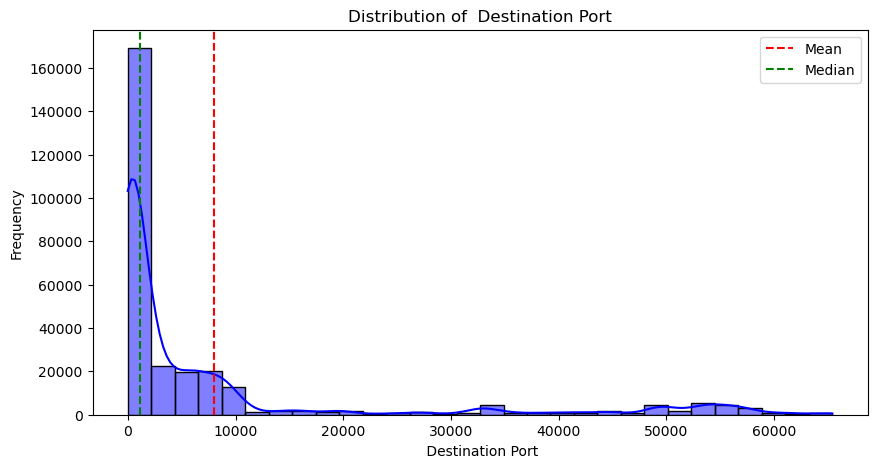

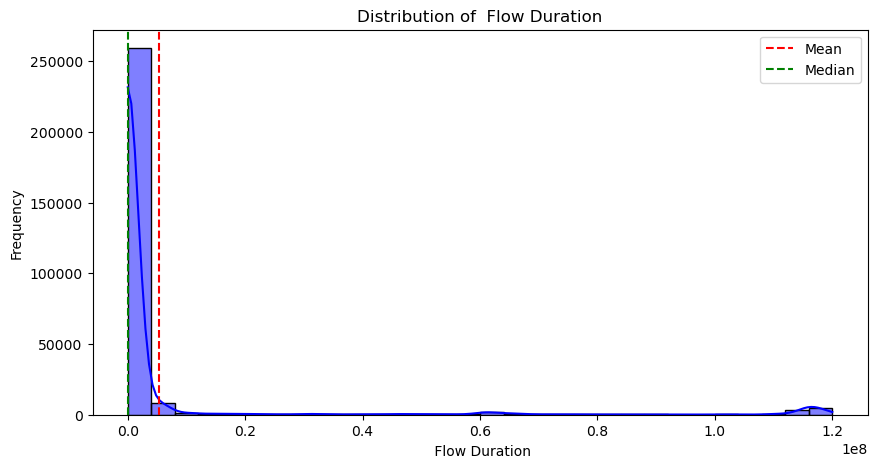

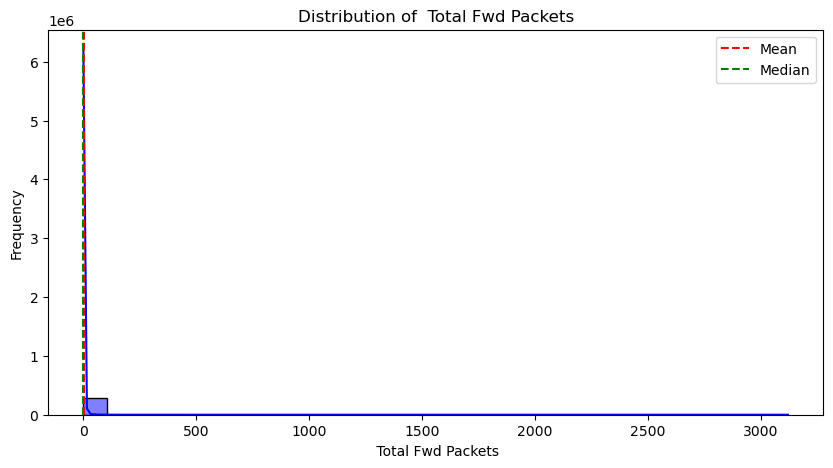

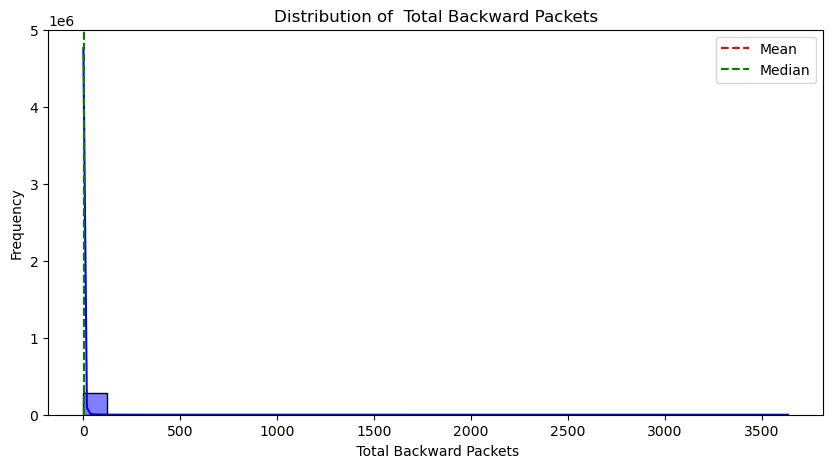

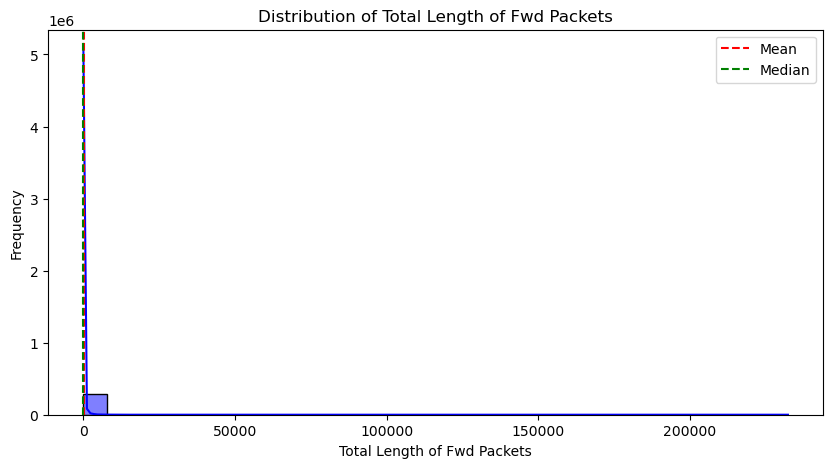

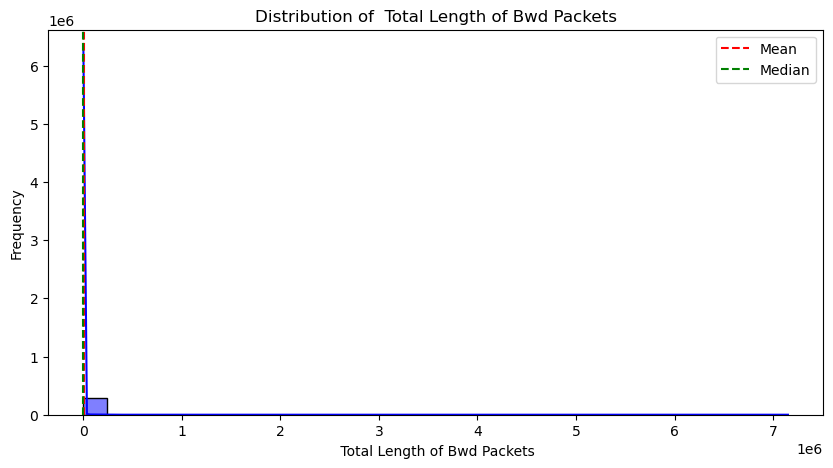

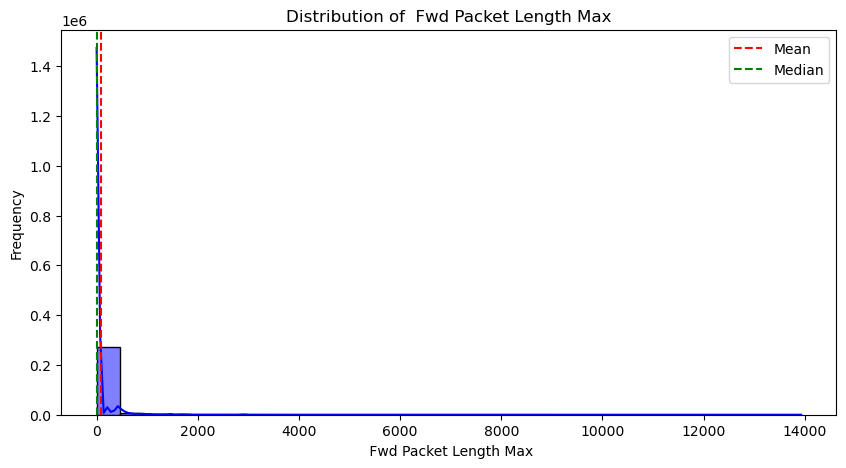

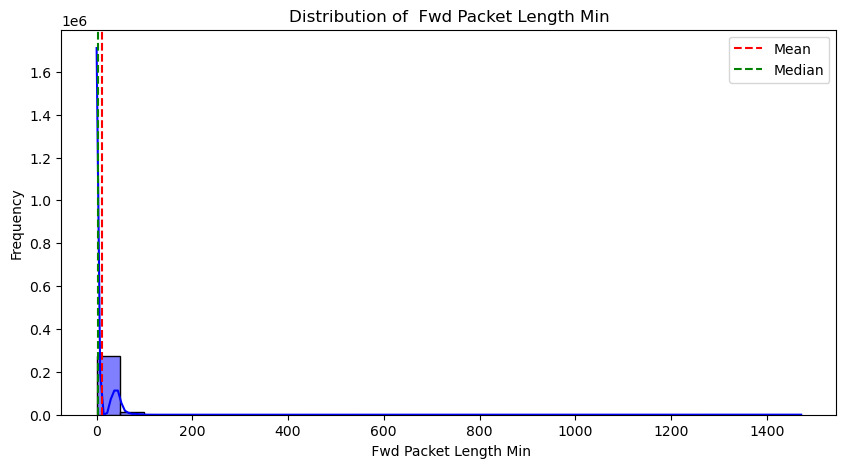

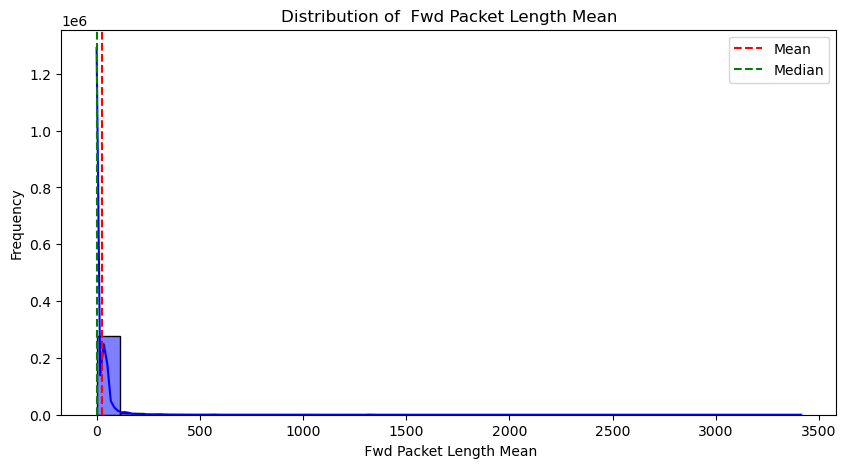

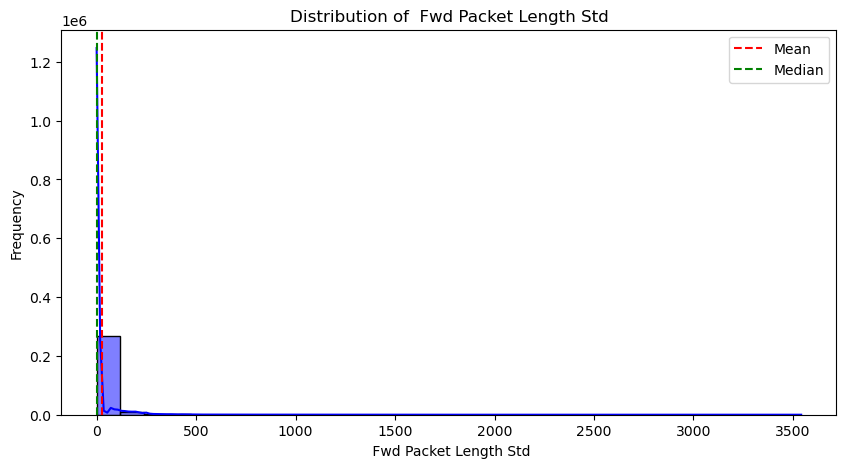

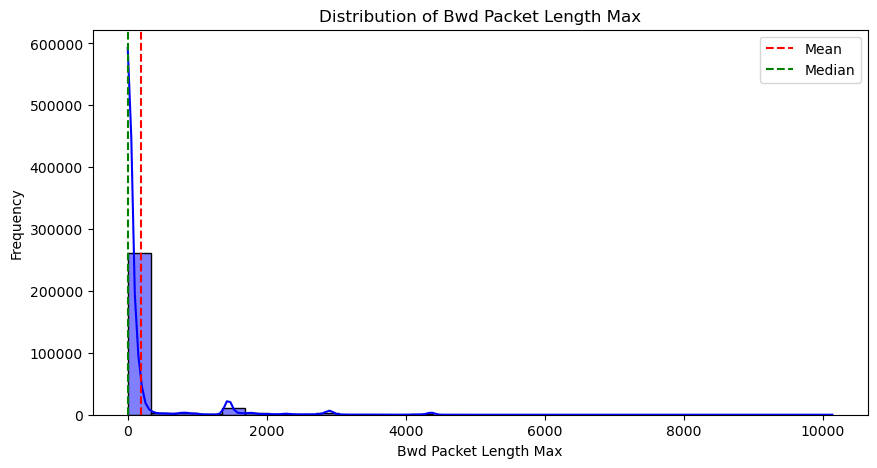

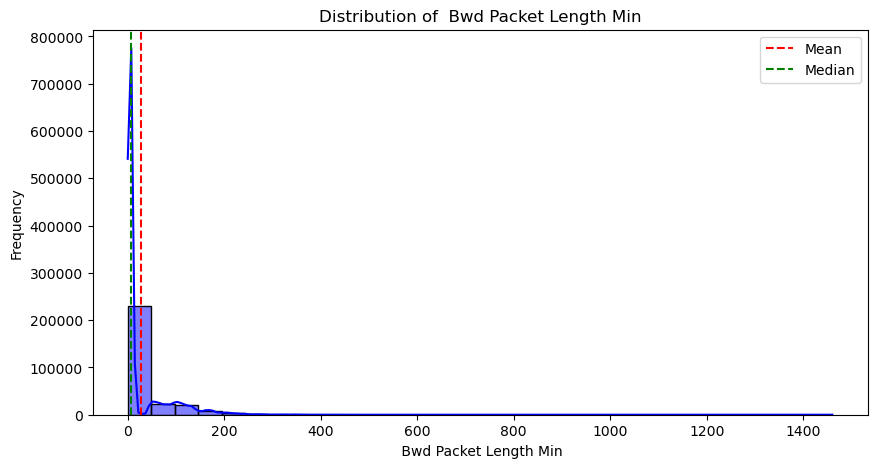

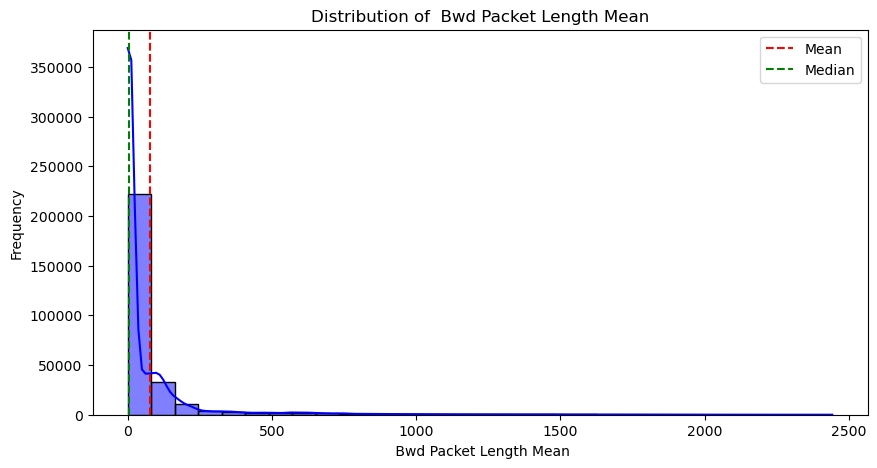

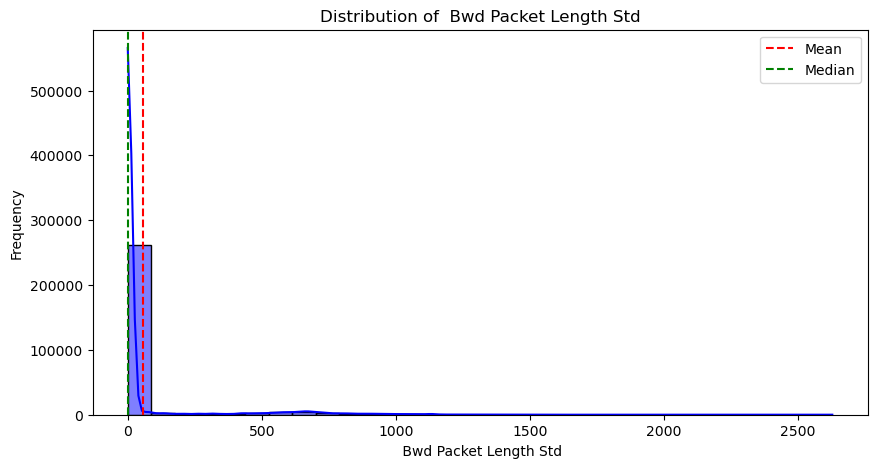

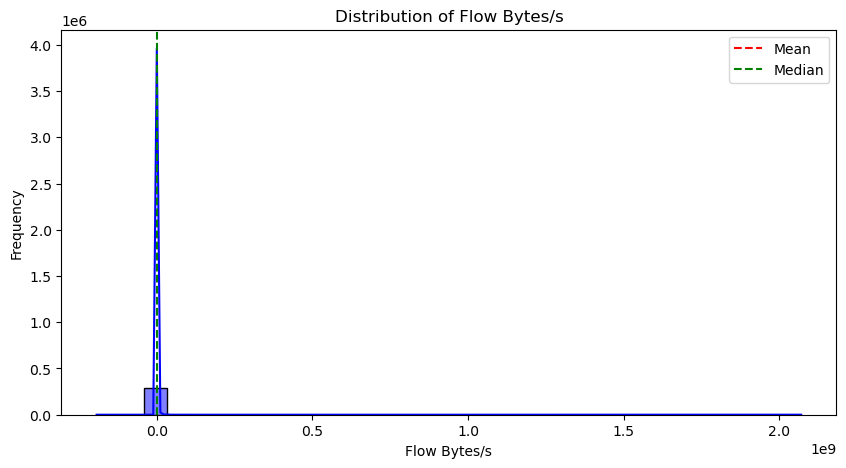

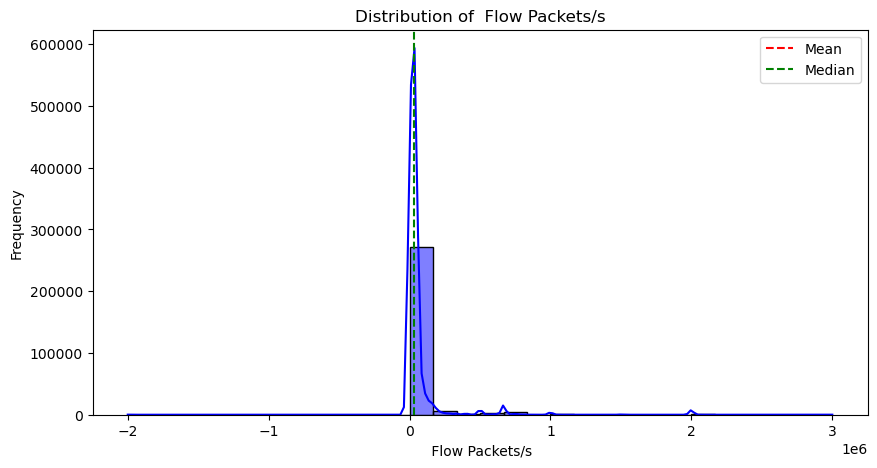

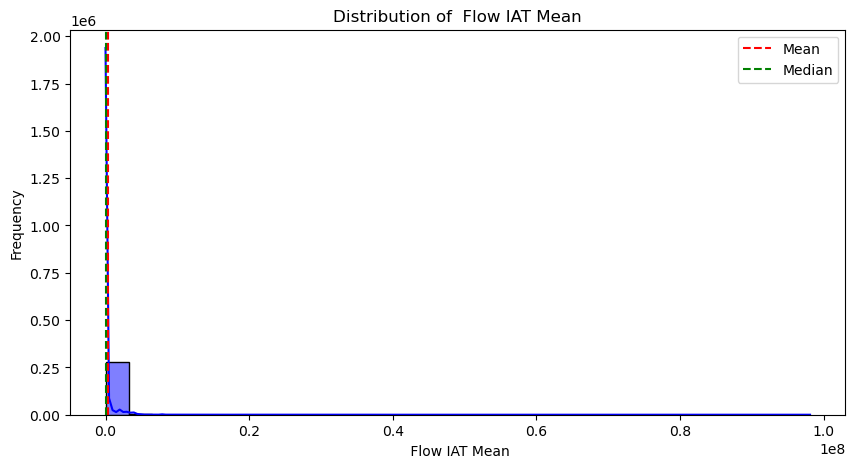

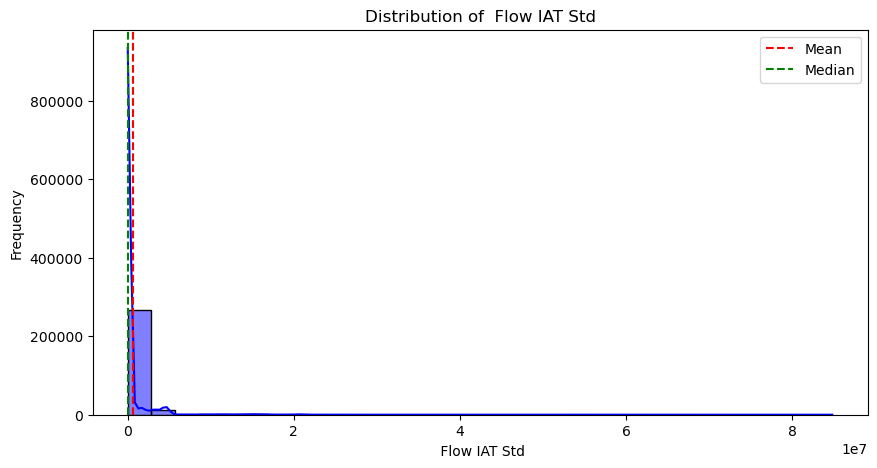

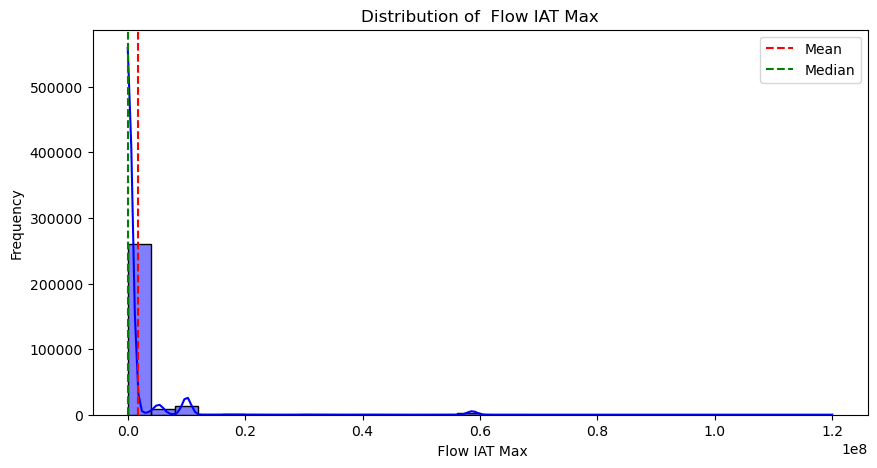

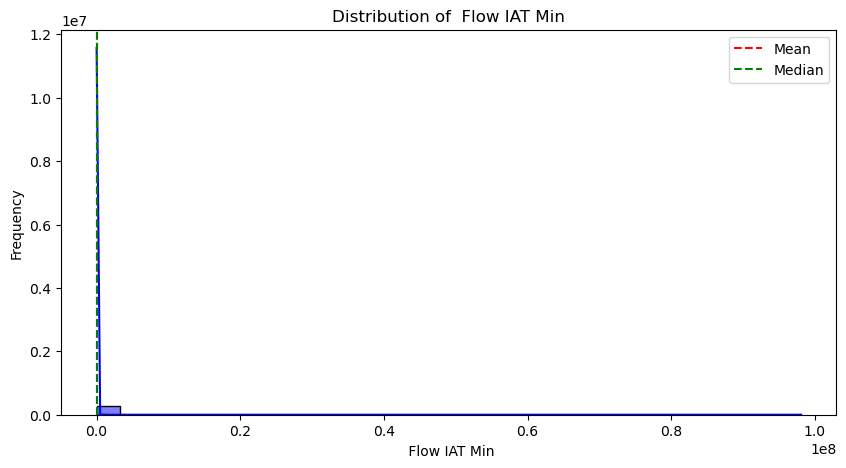

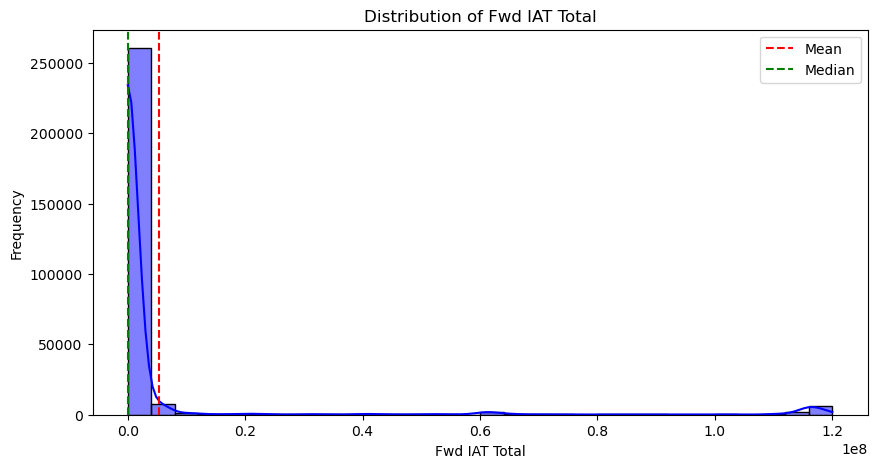

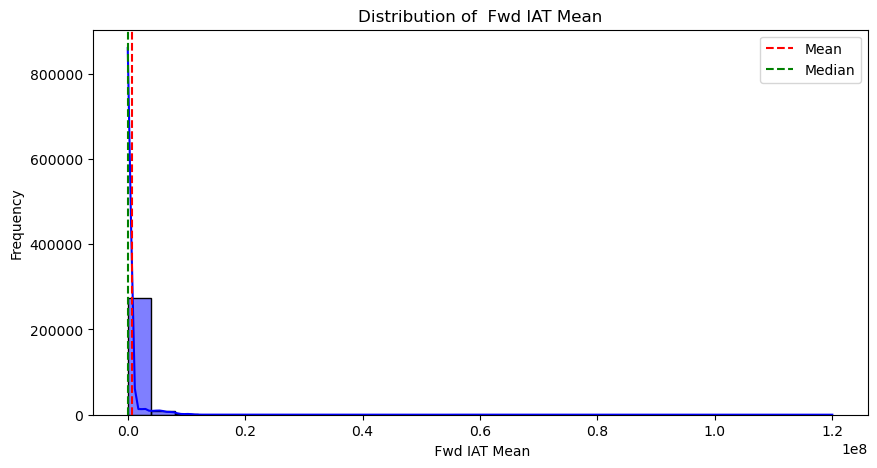

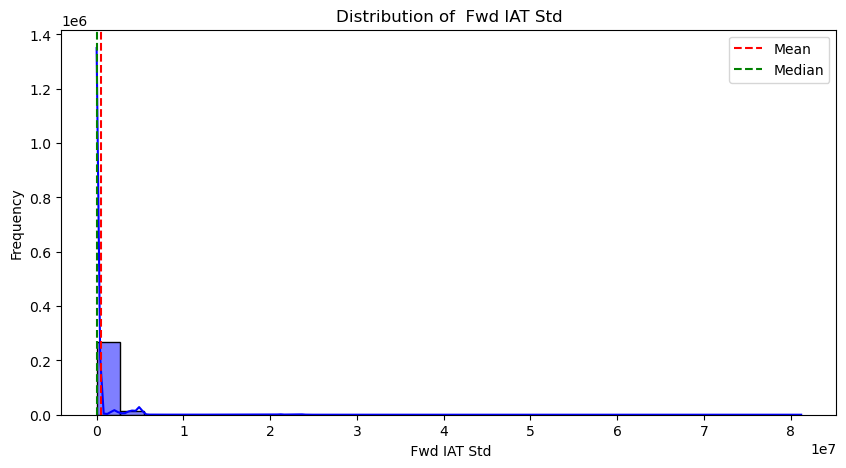

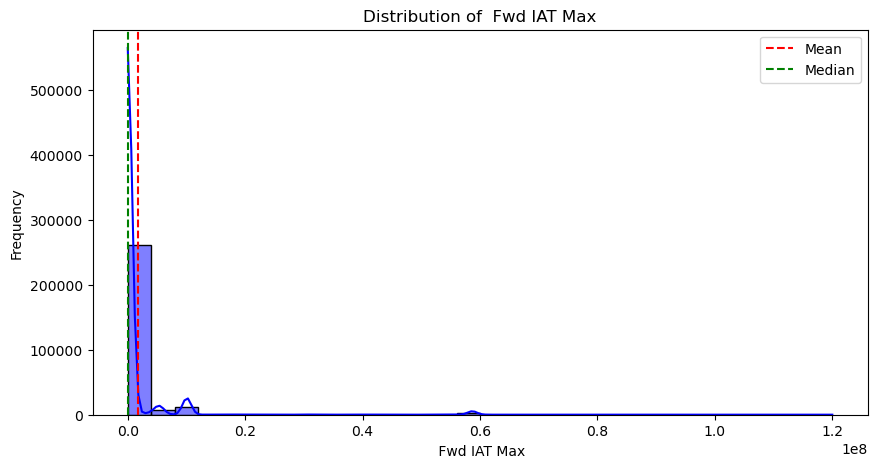

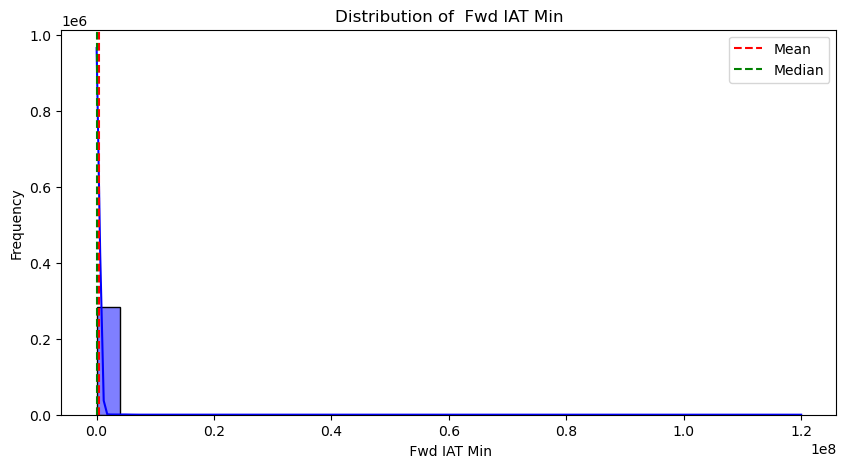

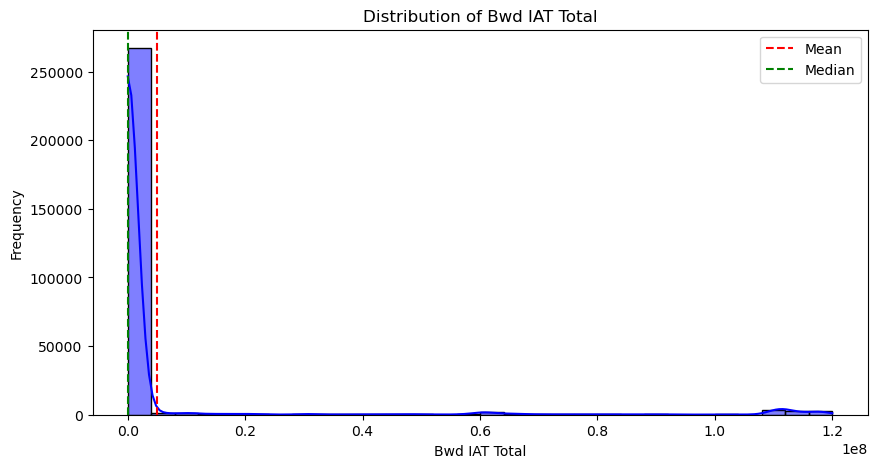

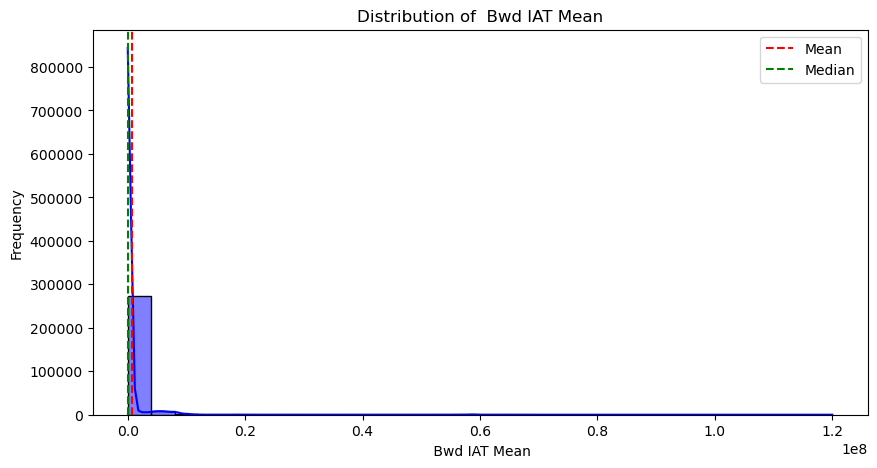

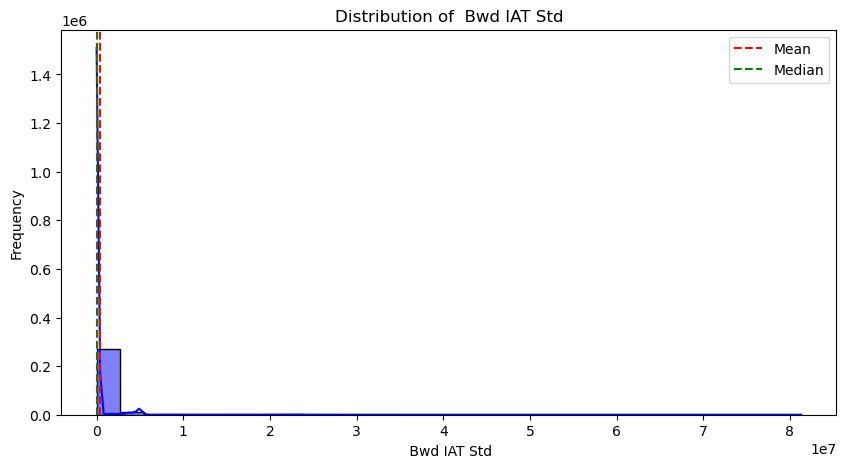

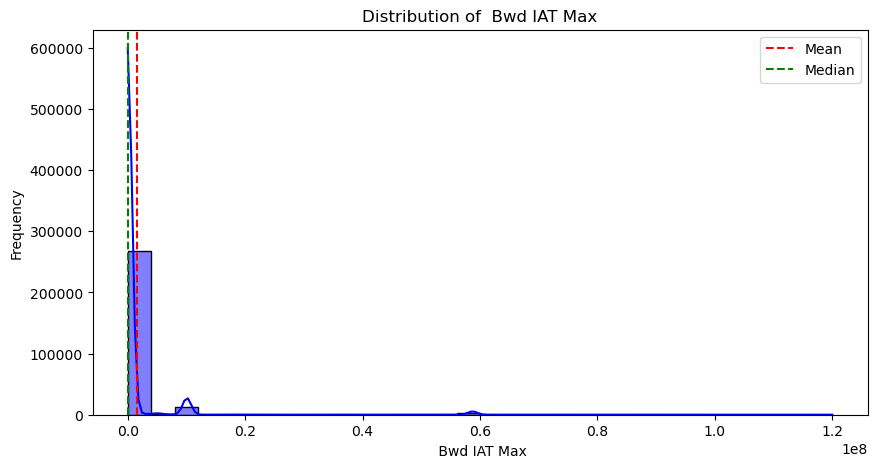

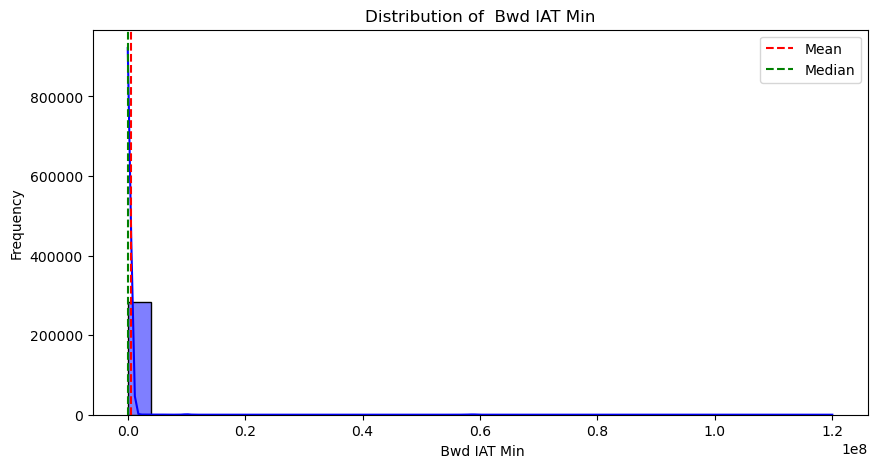

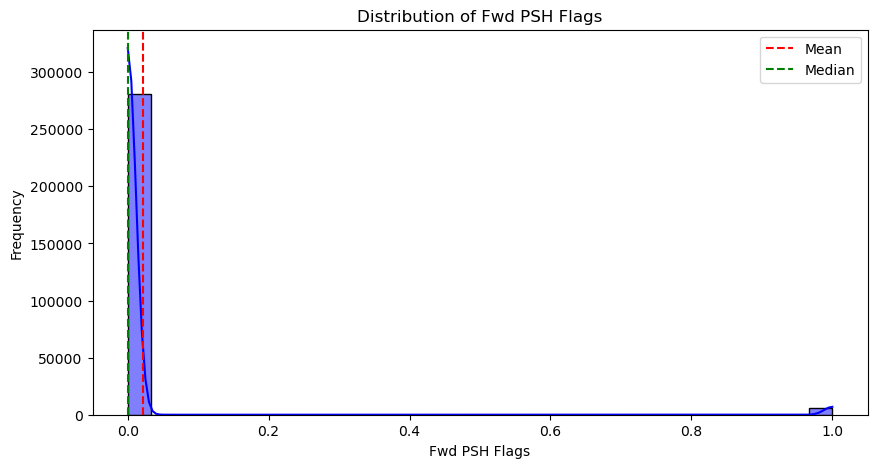

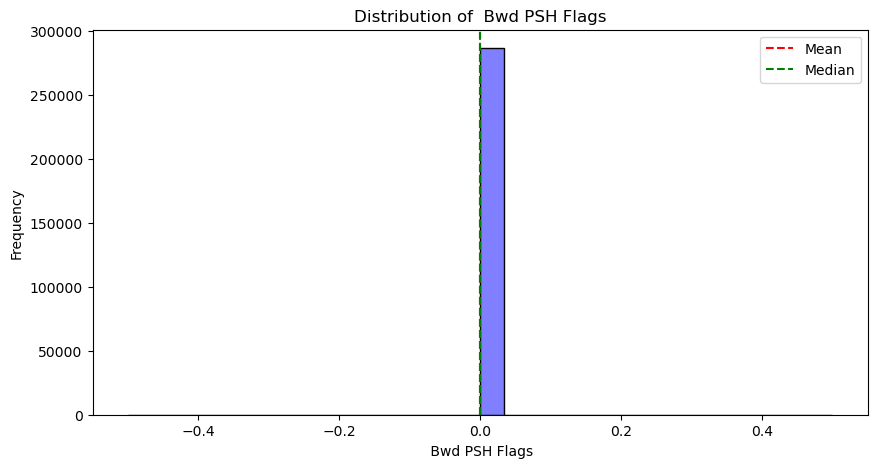

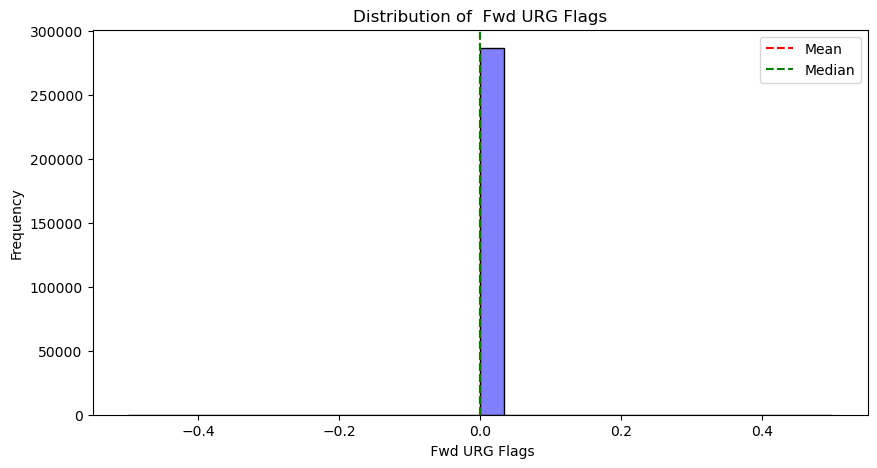

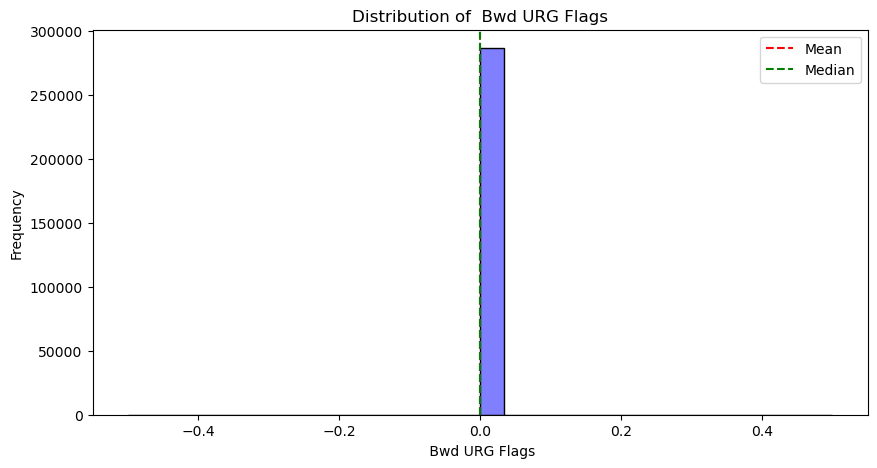

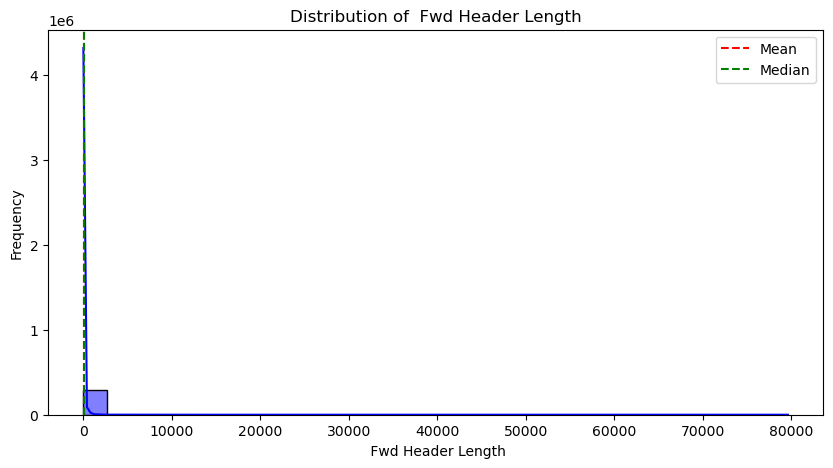

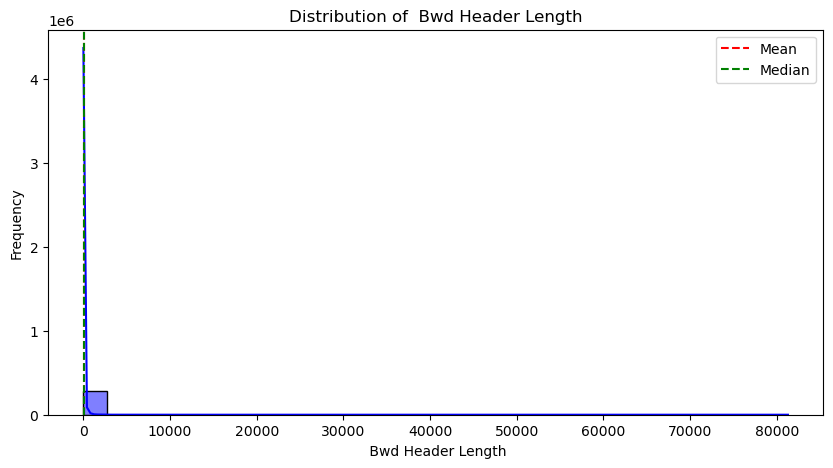

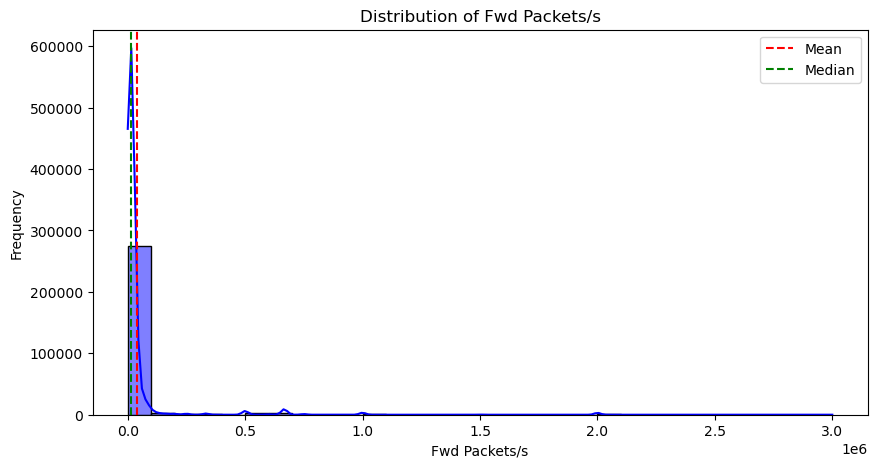

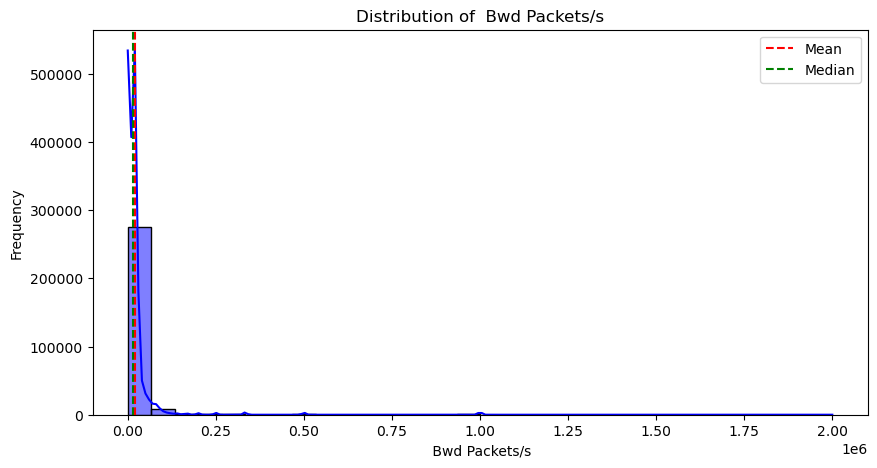

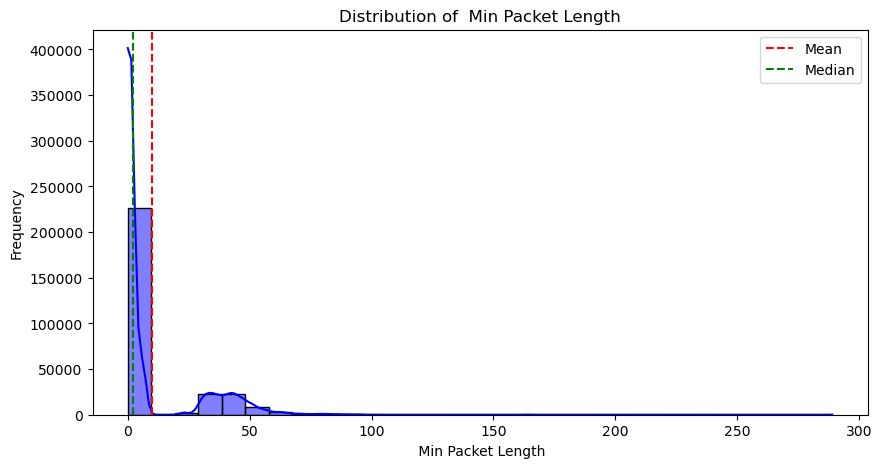

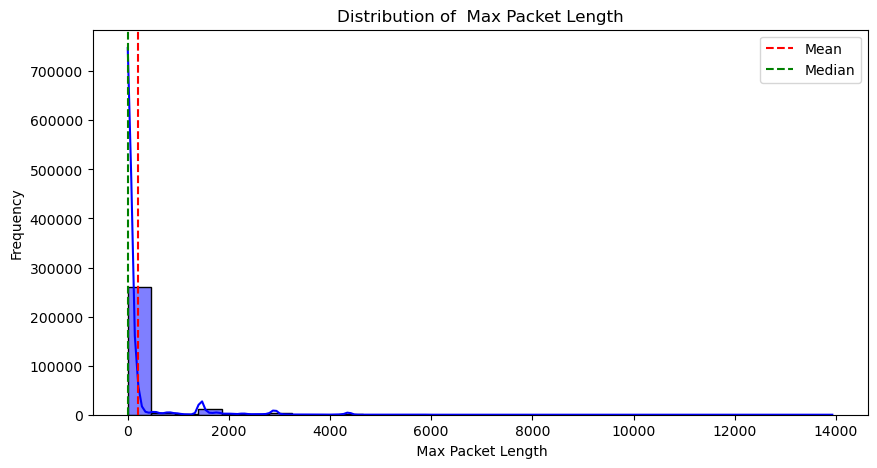

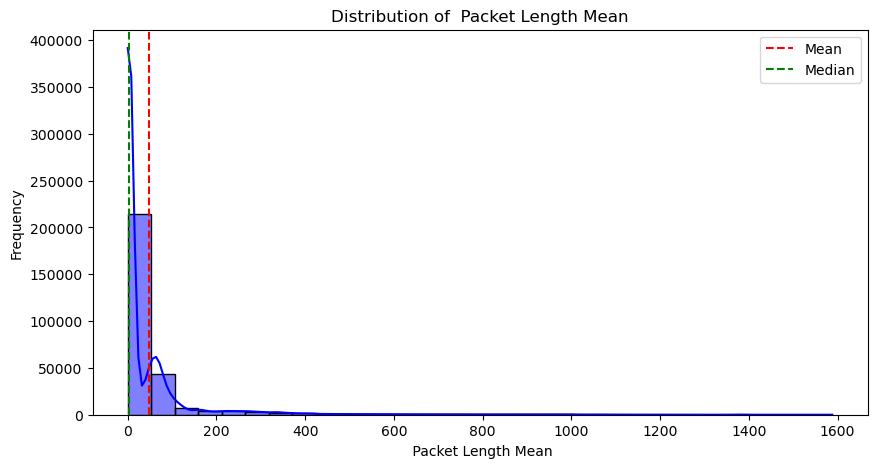

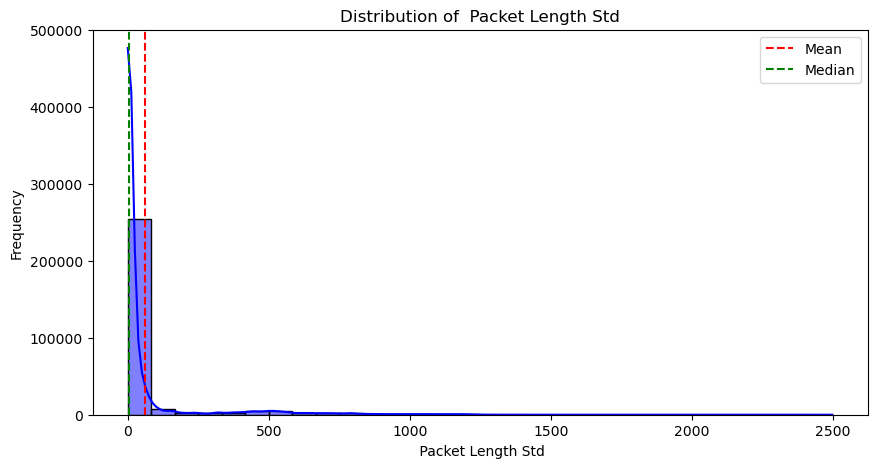

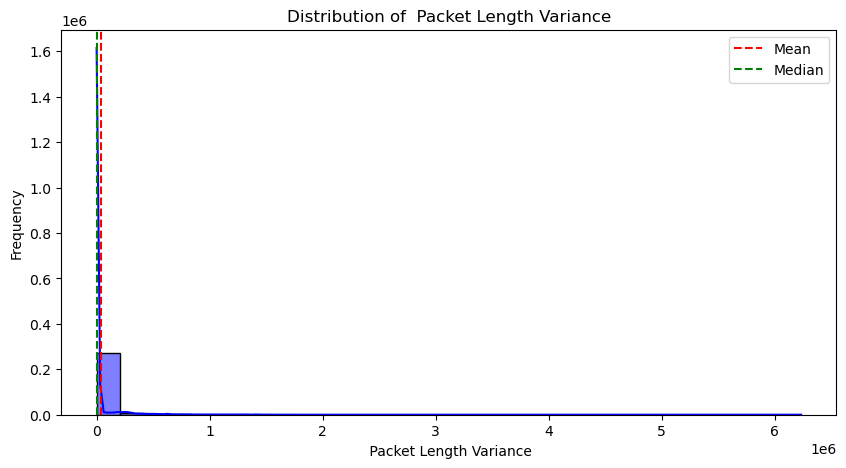

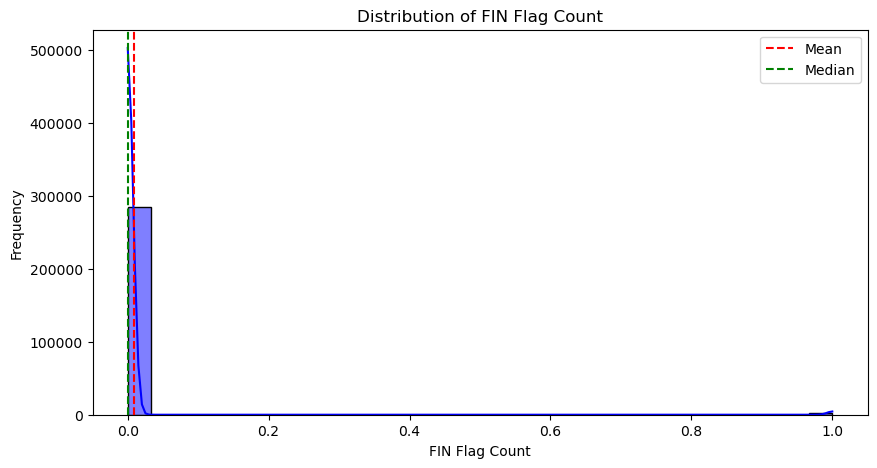

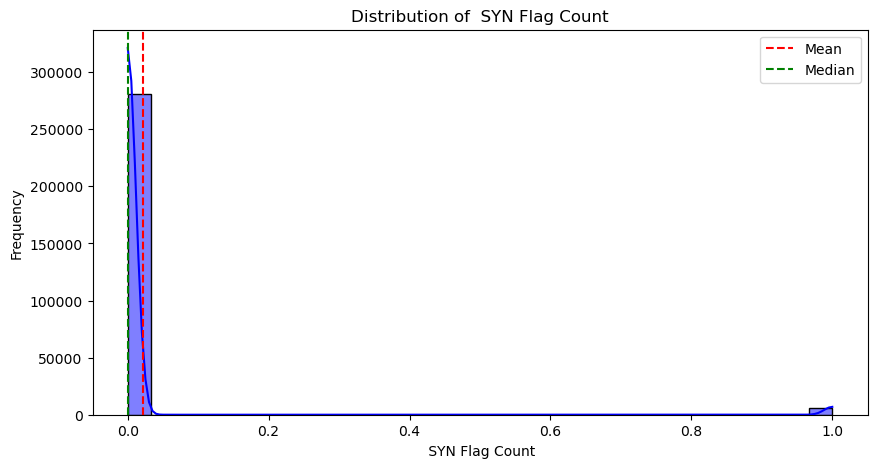

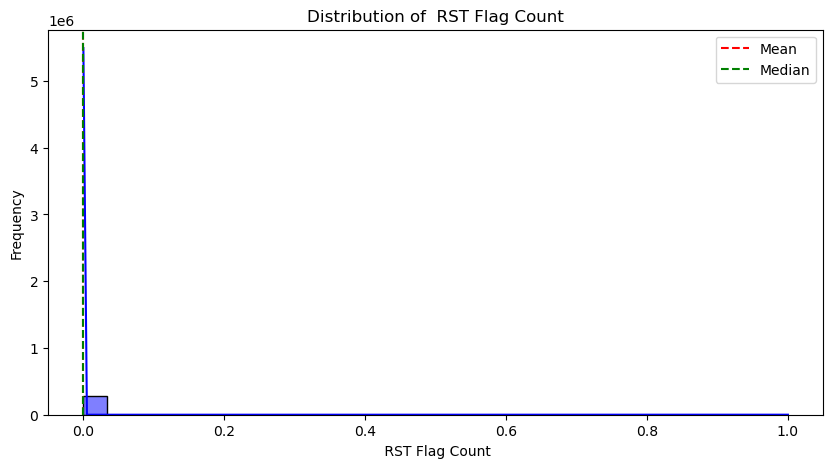

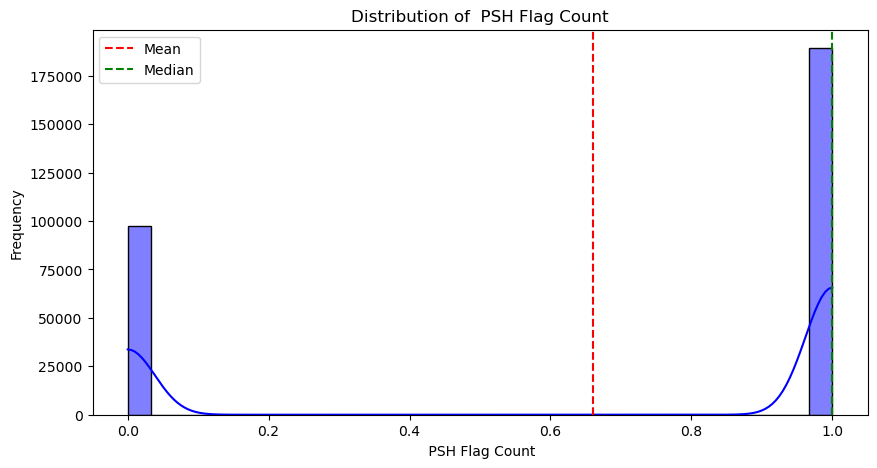

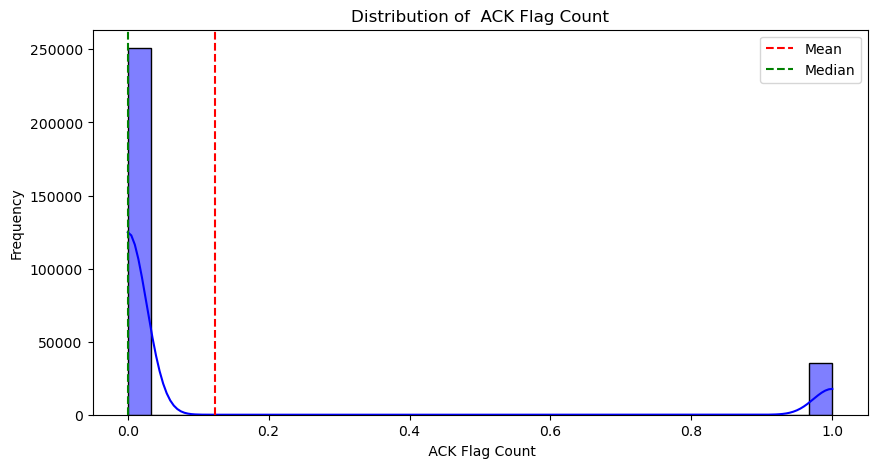

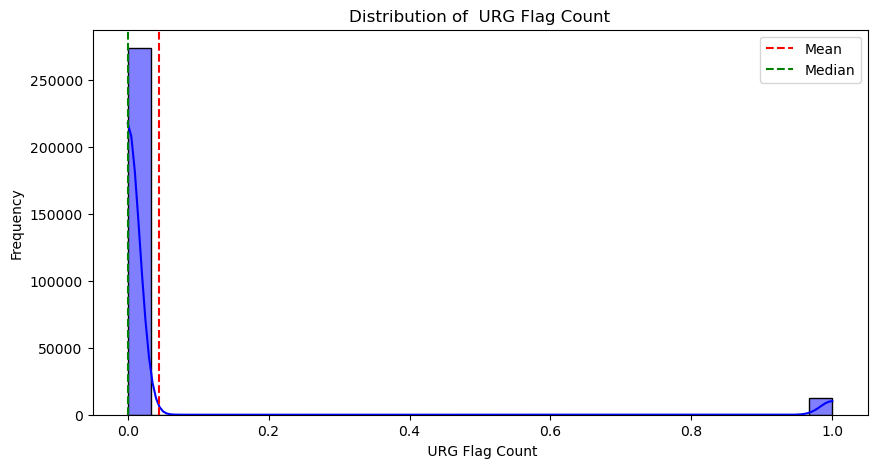

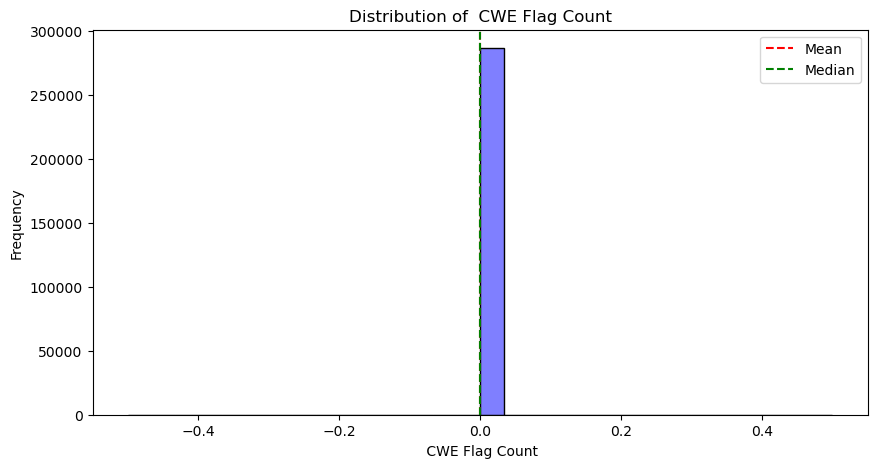

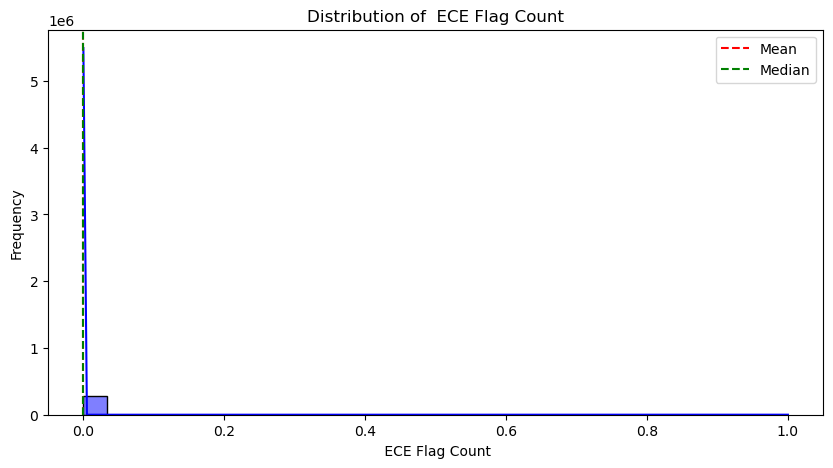

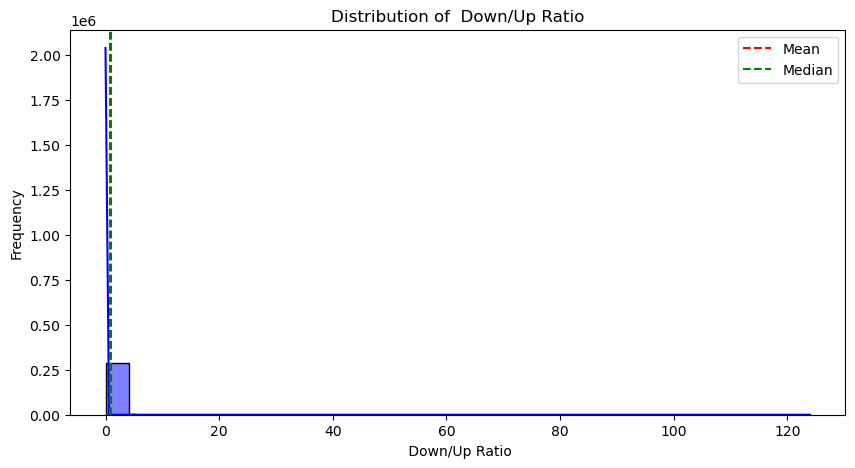

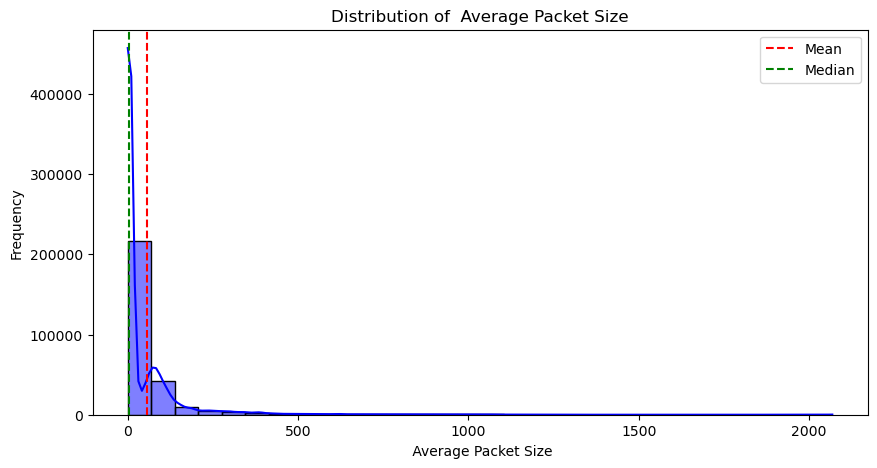

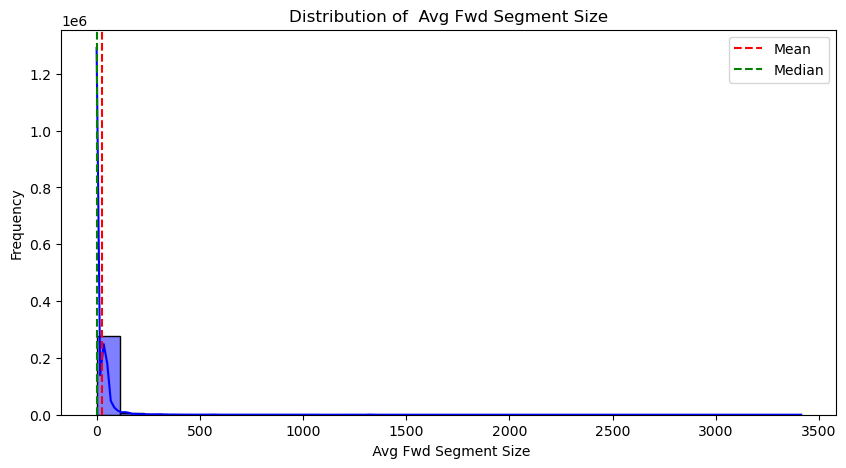

KeyboardInterrupt: 

<Figure size 1000x500 with 0 Axes>

In [84]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Frequency")
    plt.axvline(data[feature].mean(), color='red', linestyle='--', label='Mean')
    plt.axvline(data[feature].median(), color='green', linestyle='--', label='Median')
    plt.legend()
    plt.show()


### Checking for Outliers using Boxplots

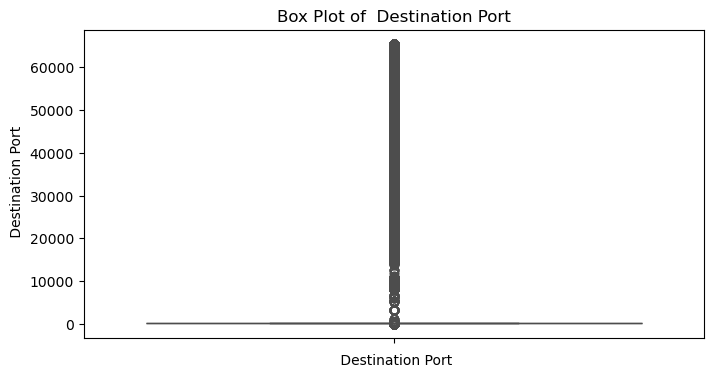

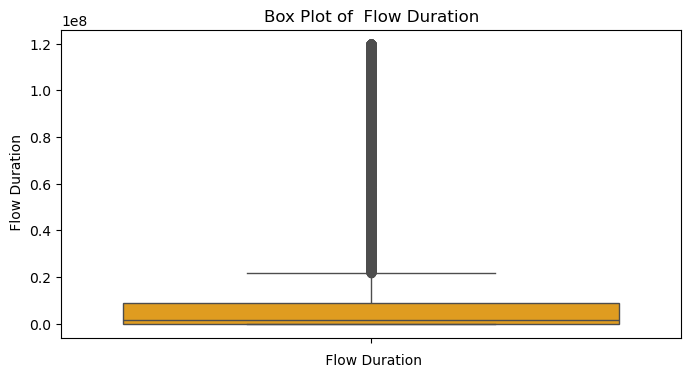

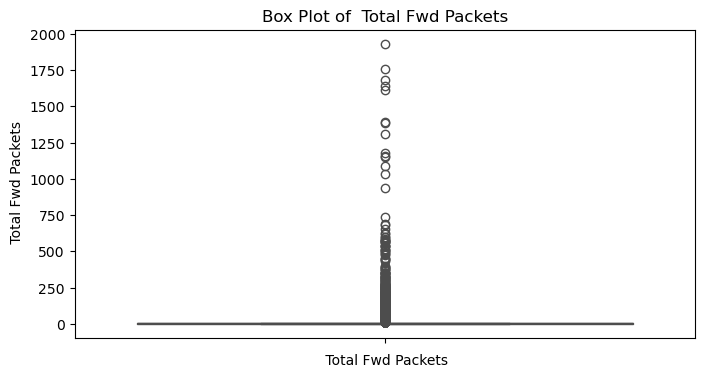

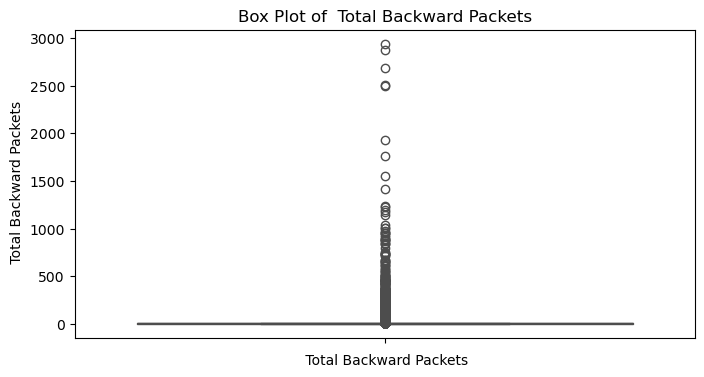

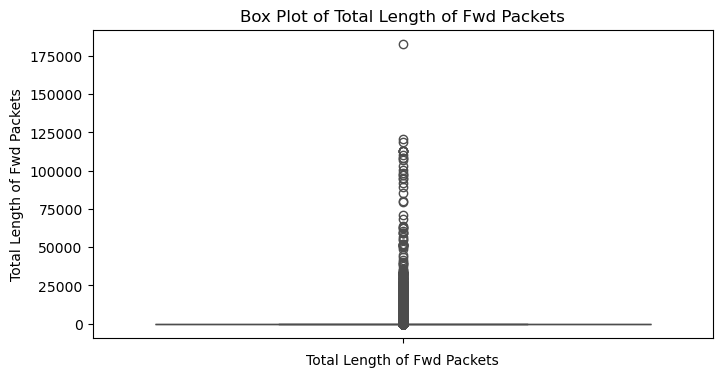

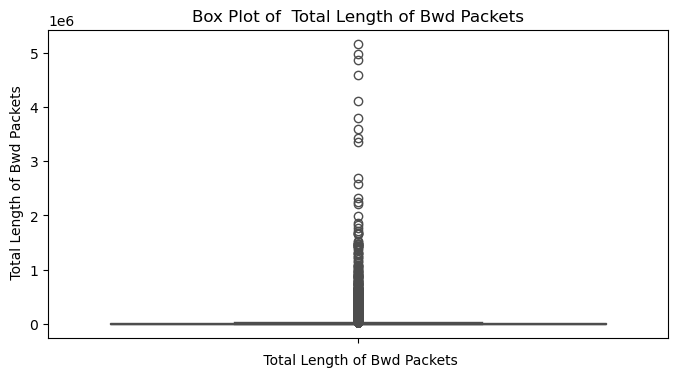

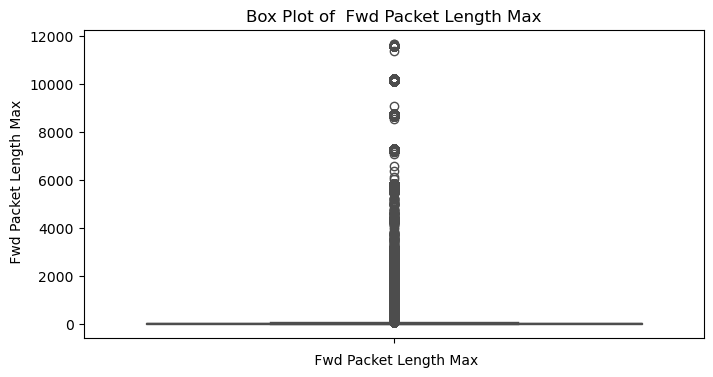

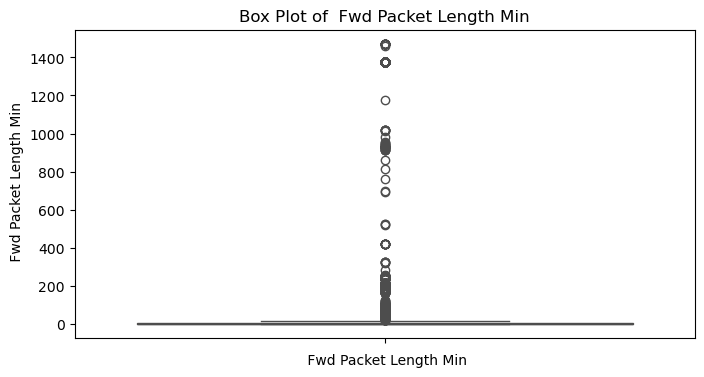

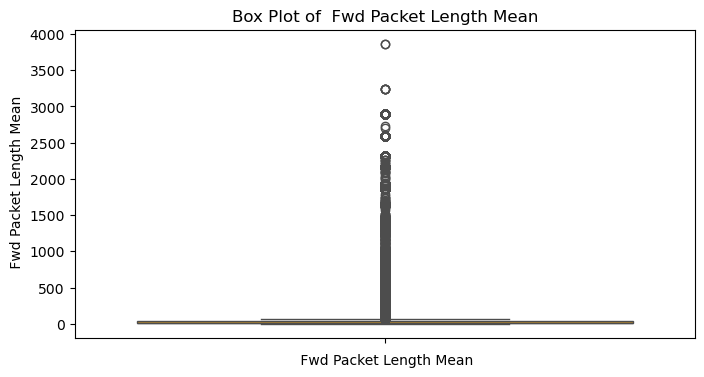

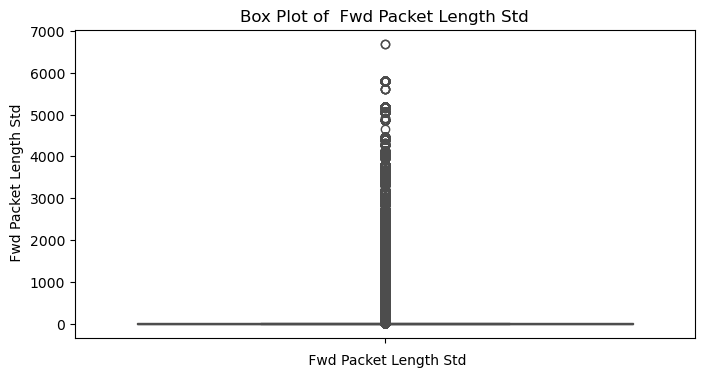

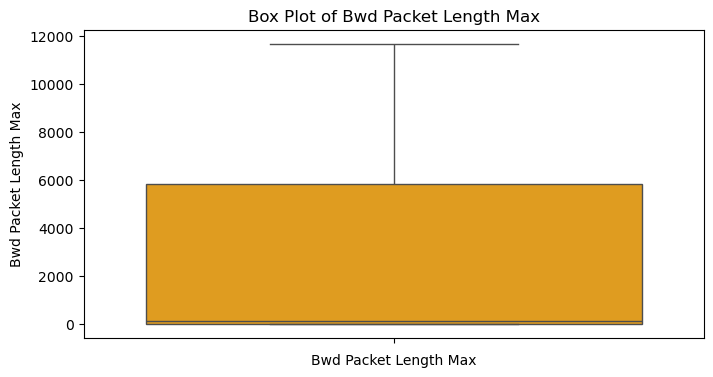

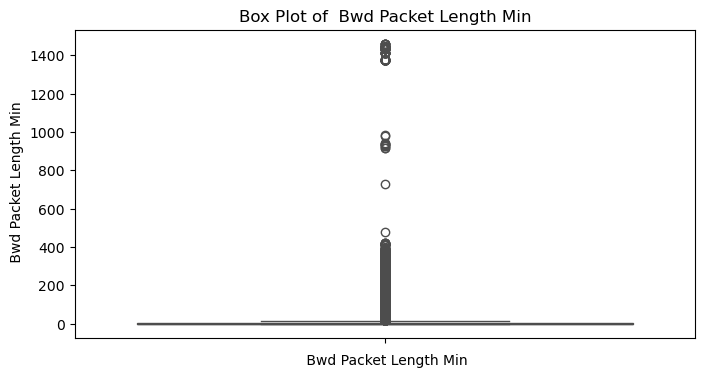

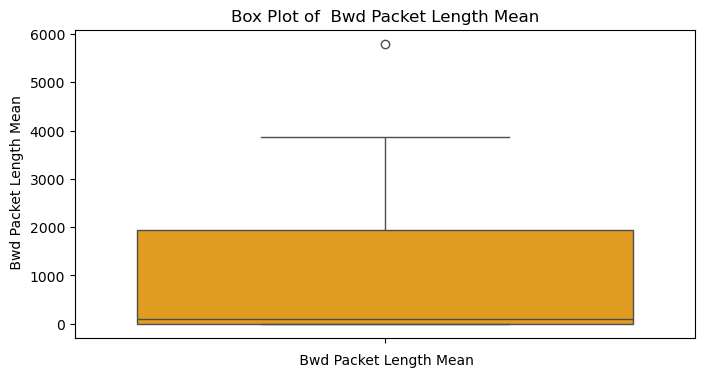

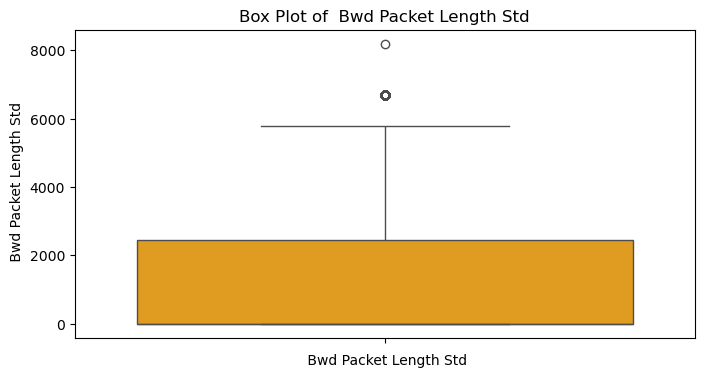

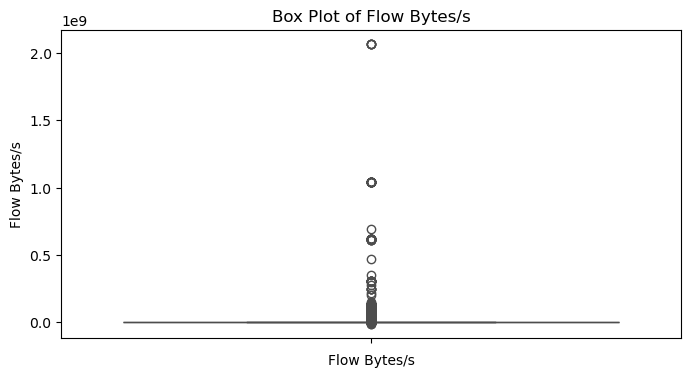

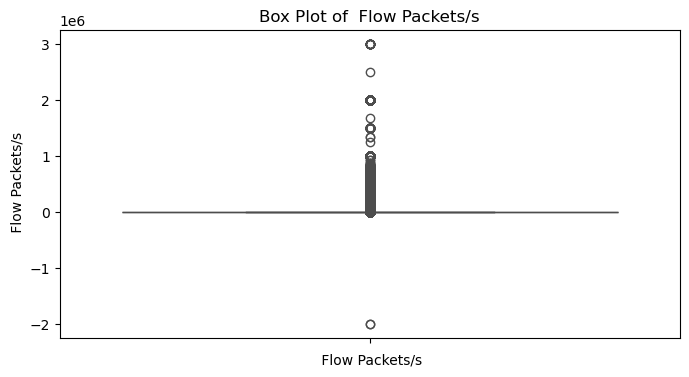

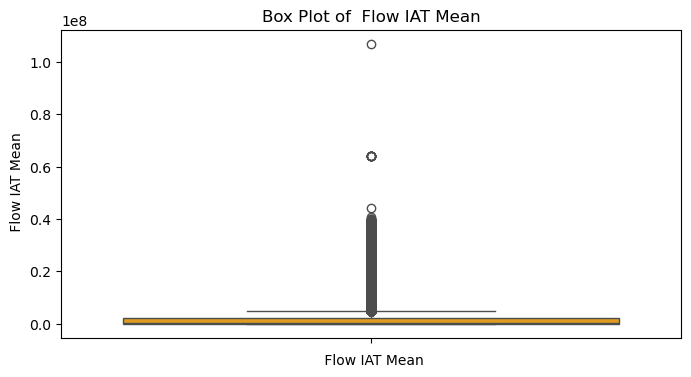

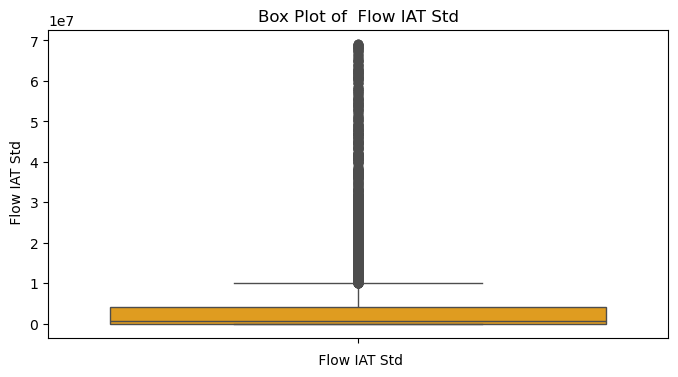

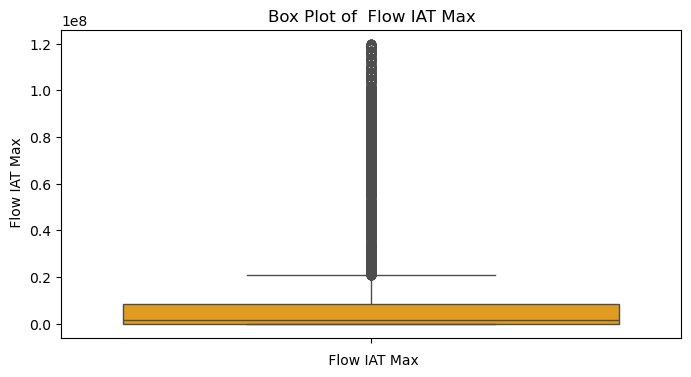

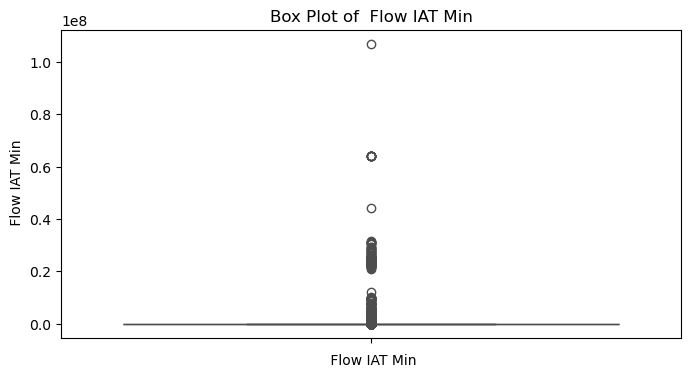

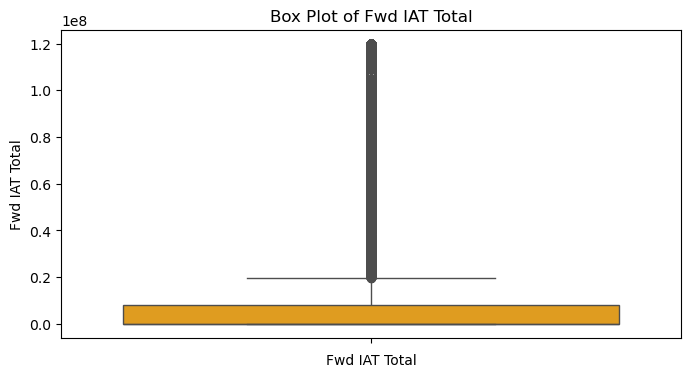

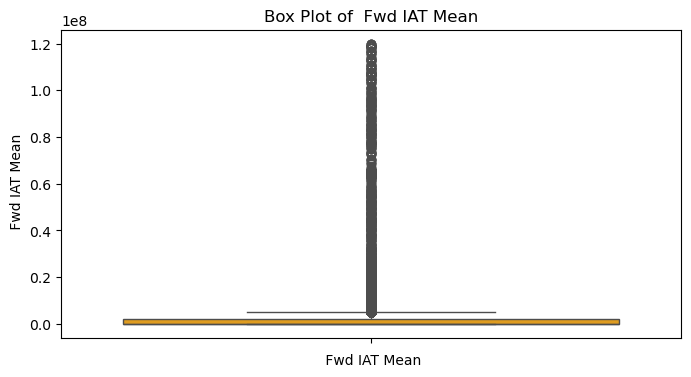

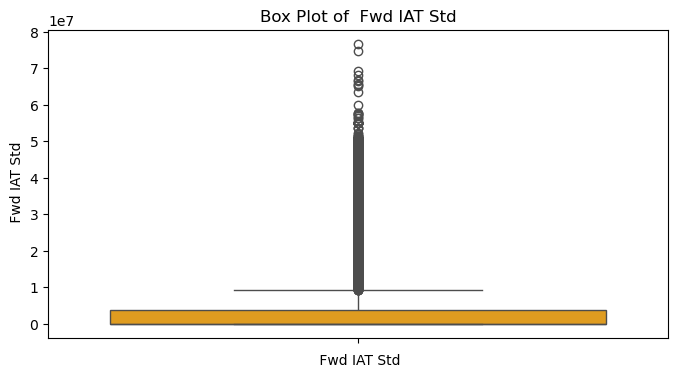

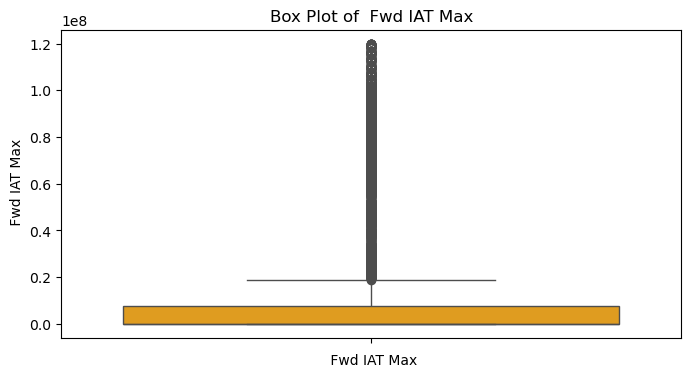

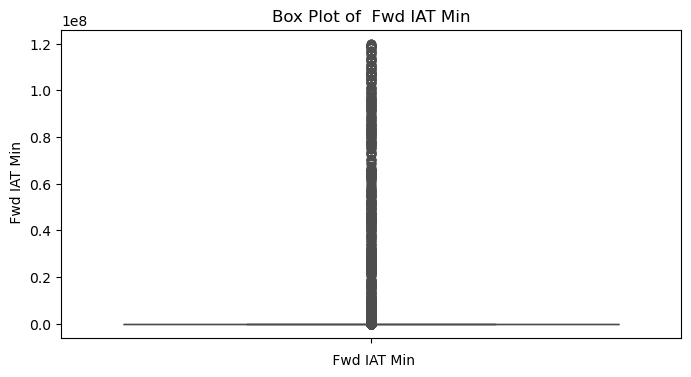

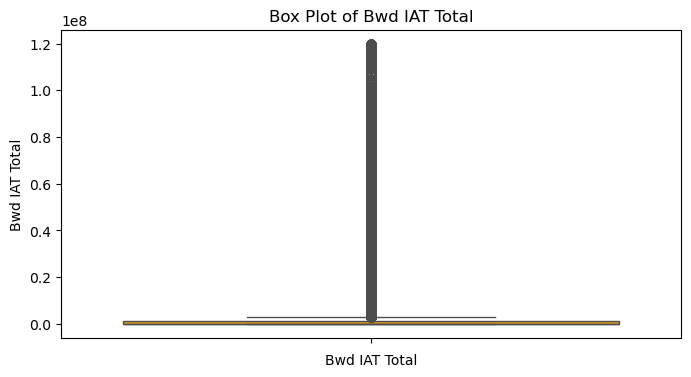

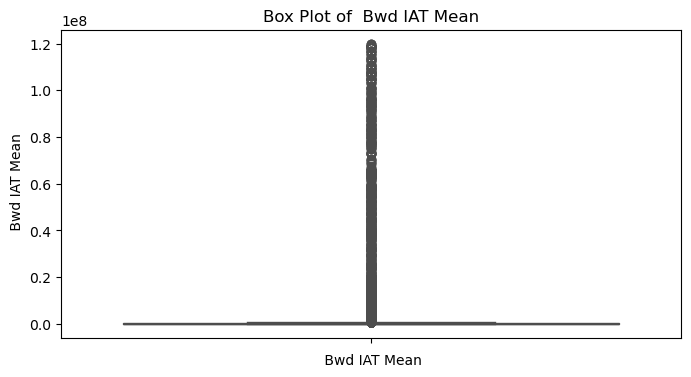

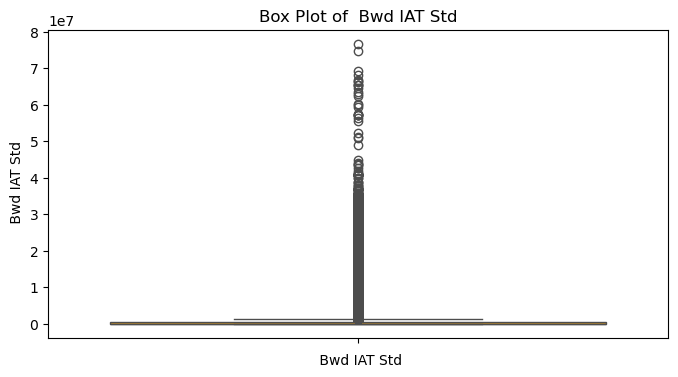

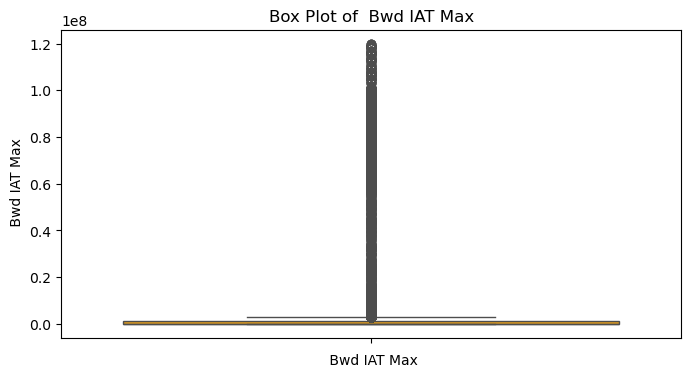

In [ ]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[feature], color='orange')
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    plt.show()


### Capping the outliers

In [15]:
def cap_outliers_iqr(df, columns):
    for col in columns:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        # Cap the values
        df[col] = np.where(df[col] < lower_bound, lower_bound, df[col])
        df[col] = np.where(df[col] > upper_bound, upper_bound, df[col])
    return df

data = cap_outliers_iqr(data, numerical_features)


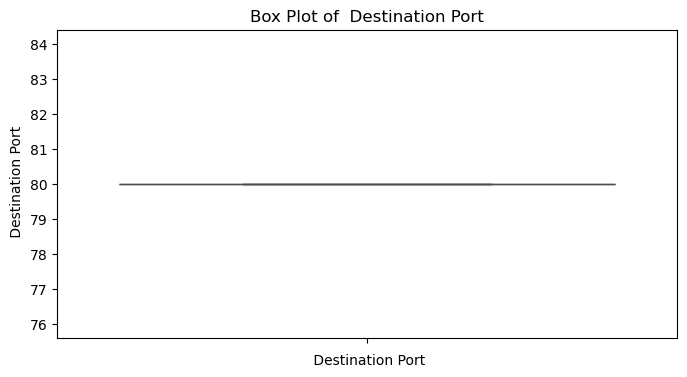

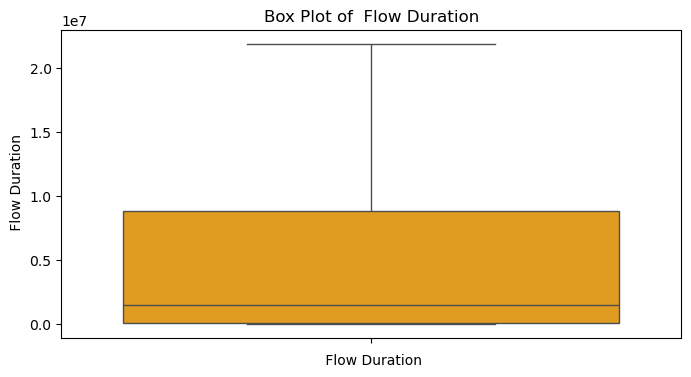

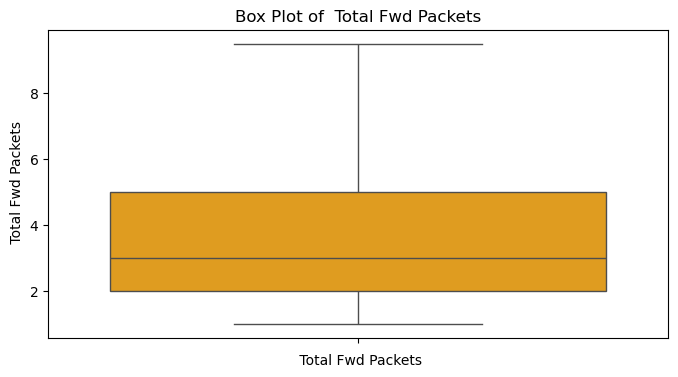

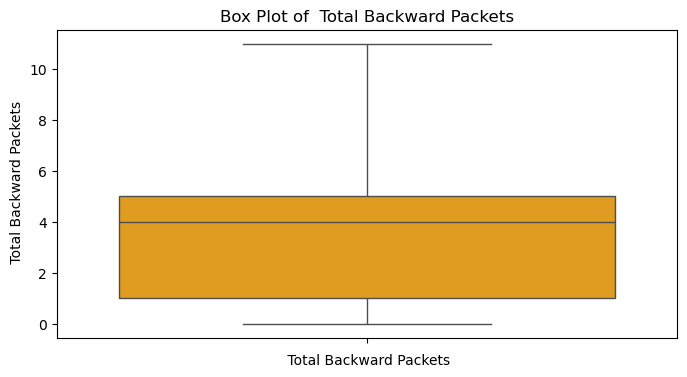

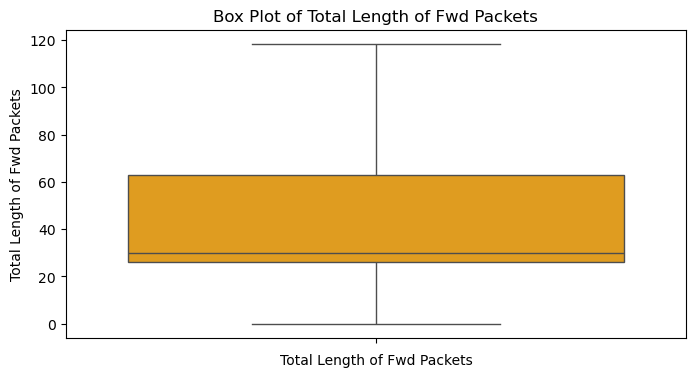

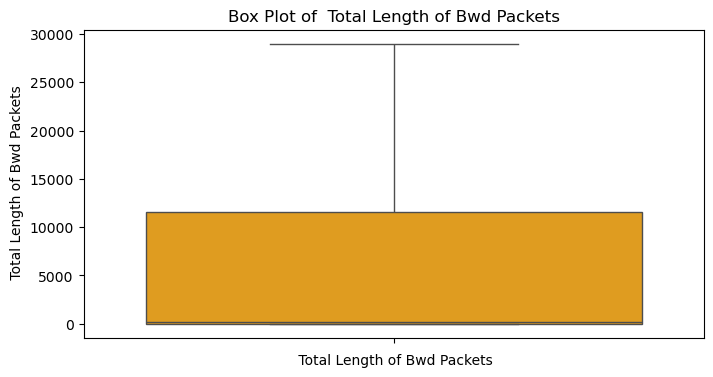

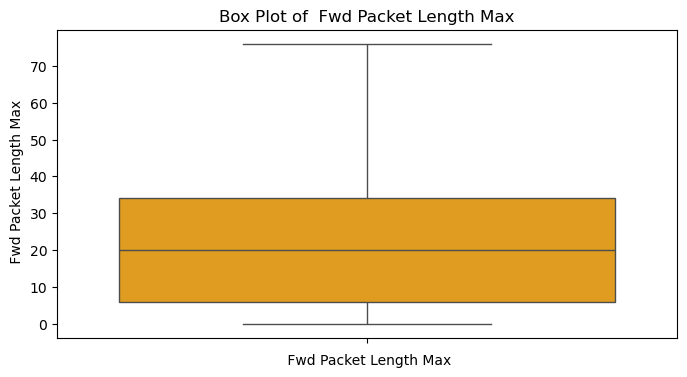

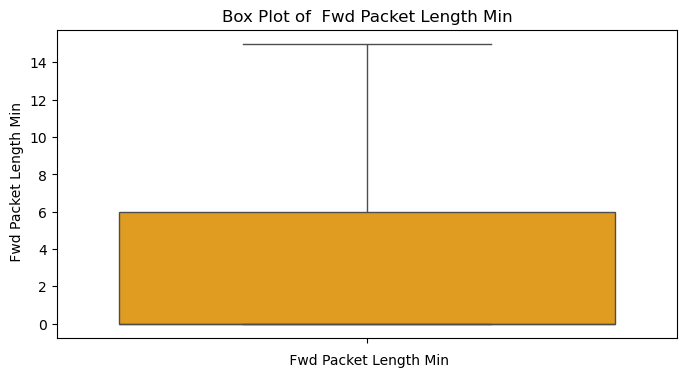

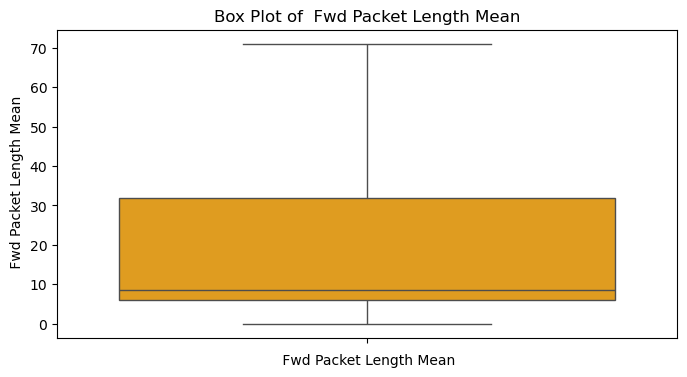

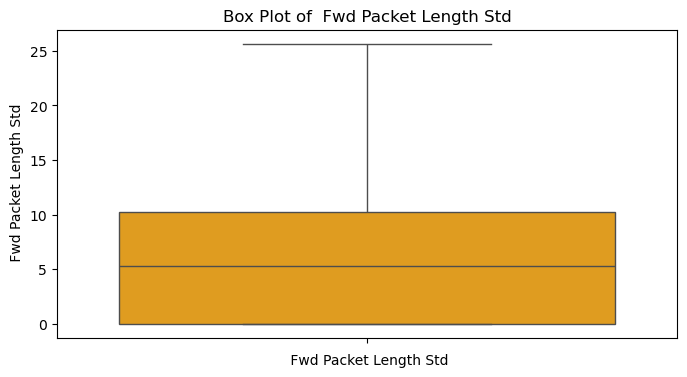

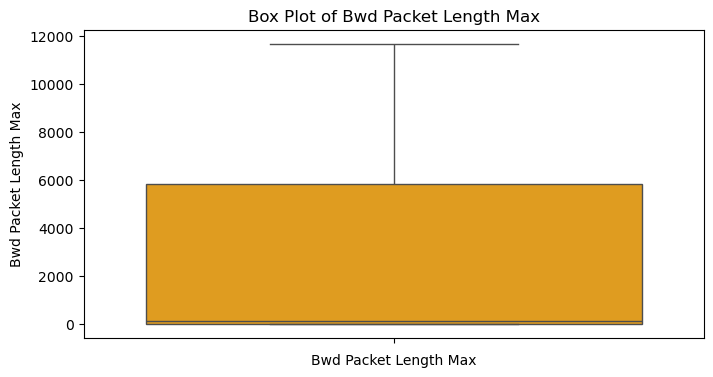

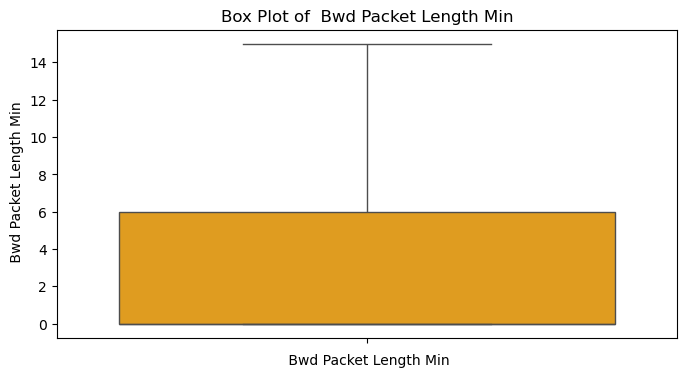

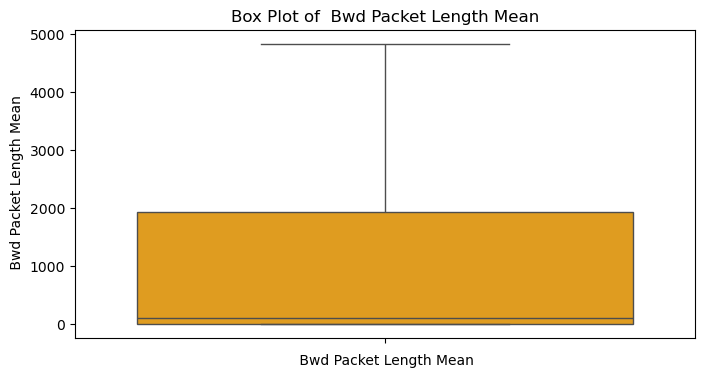

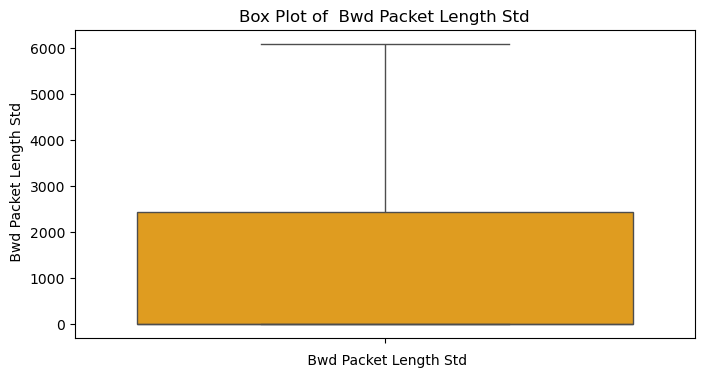

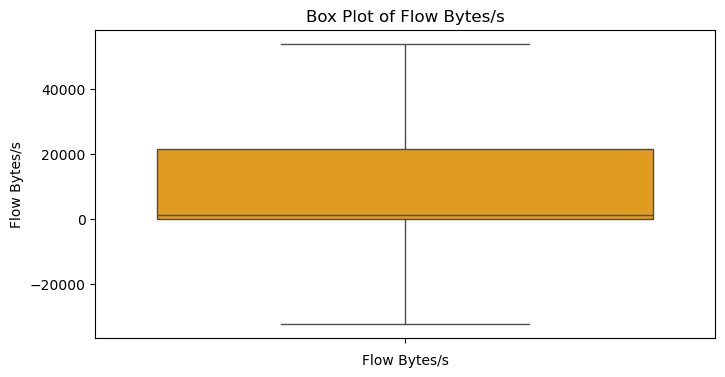

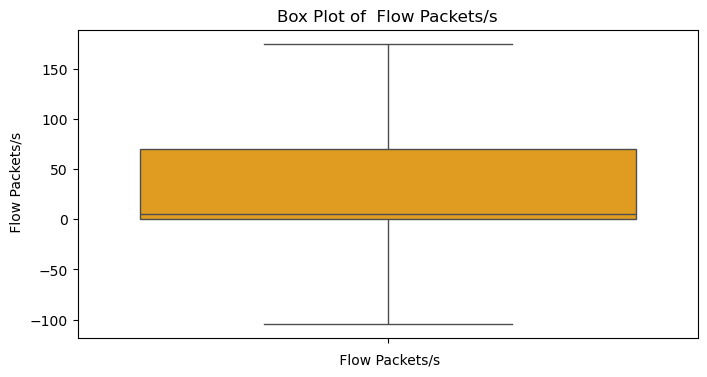

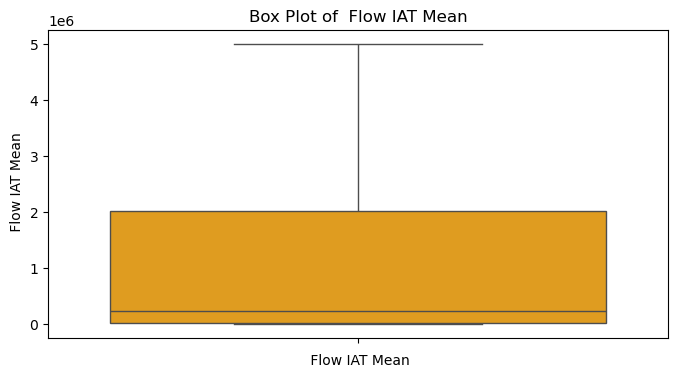

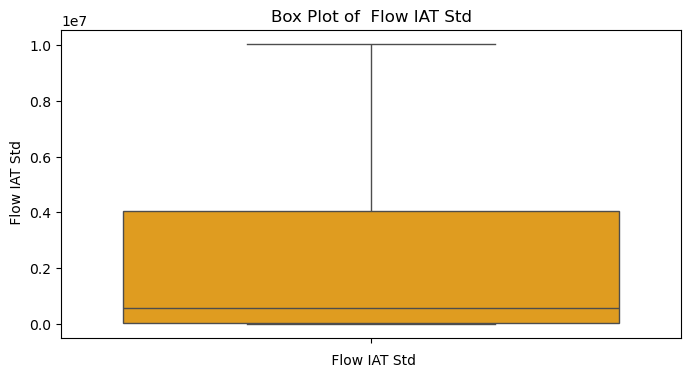

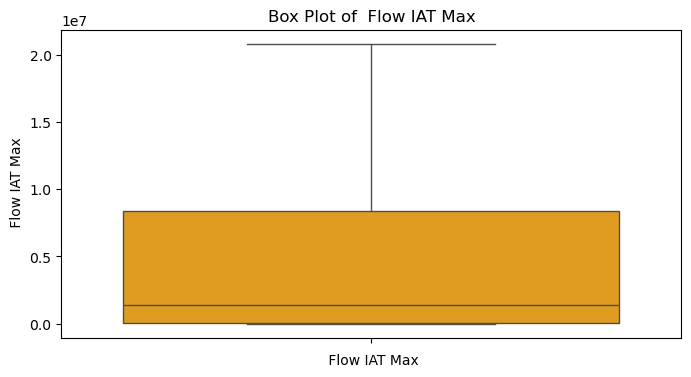

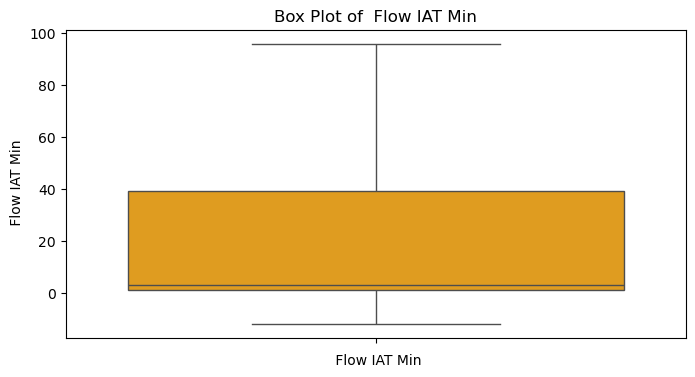

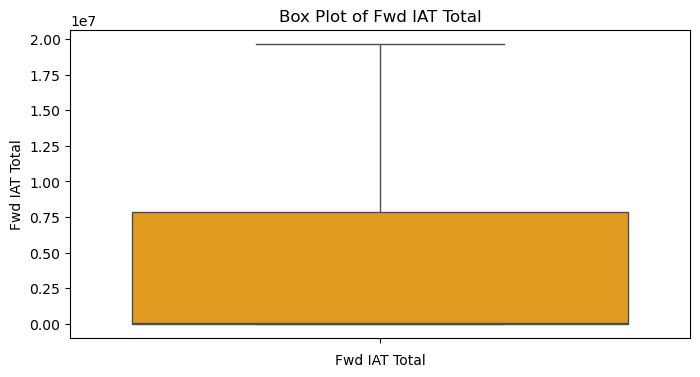

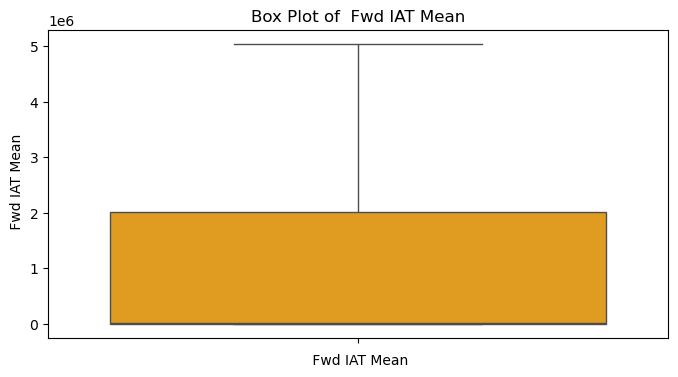

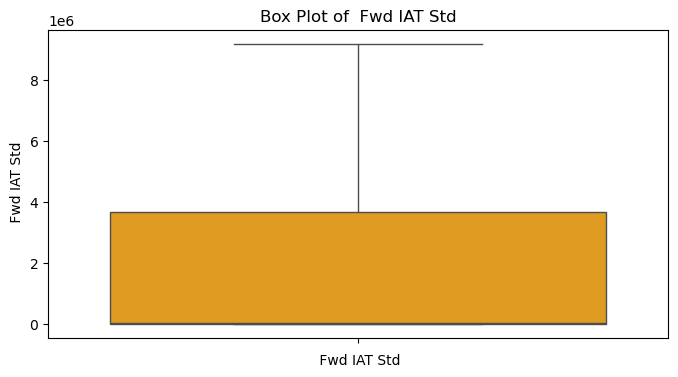

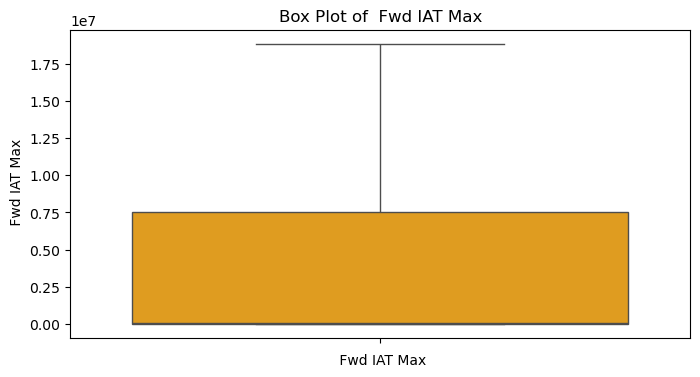

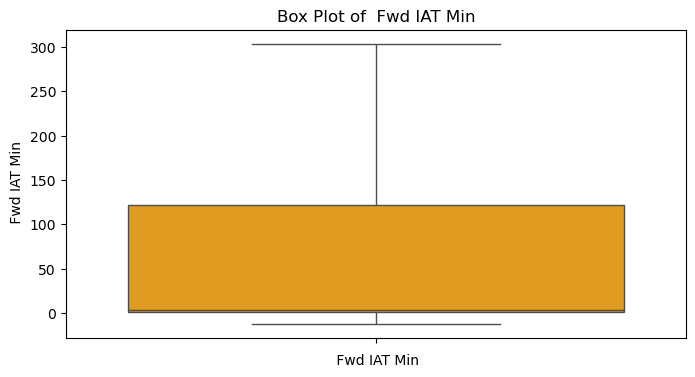

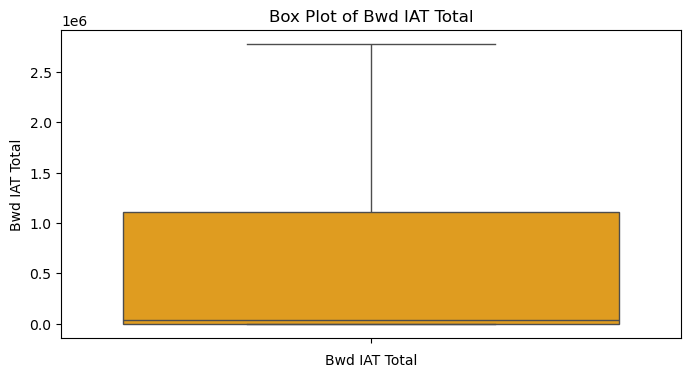

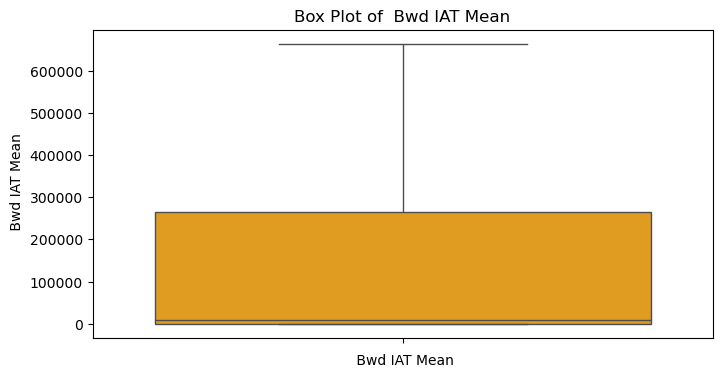

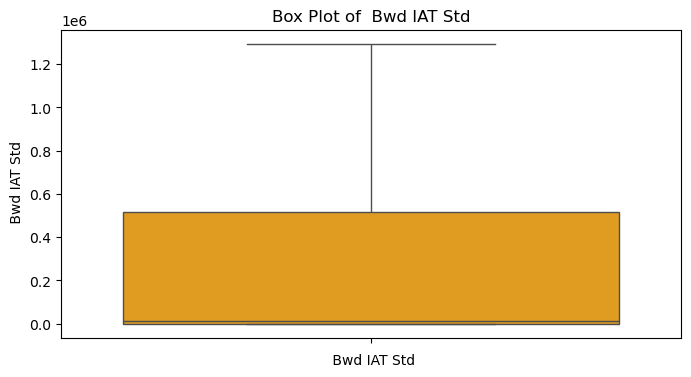

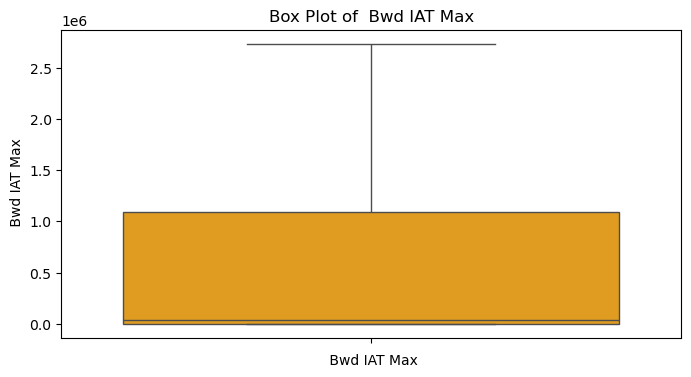

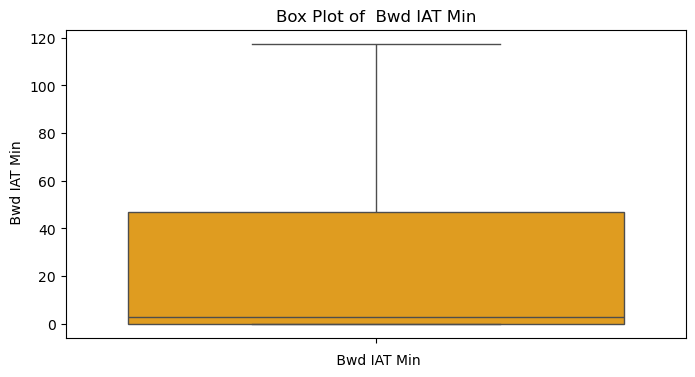

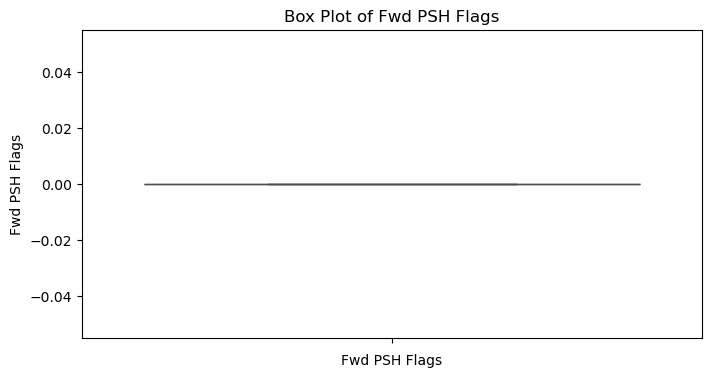

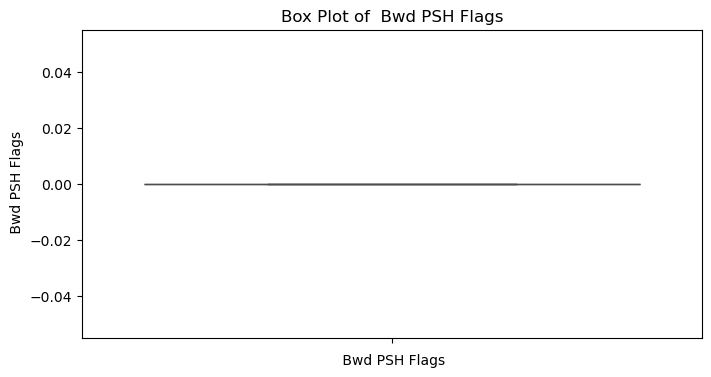

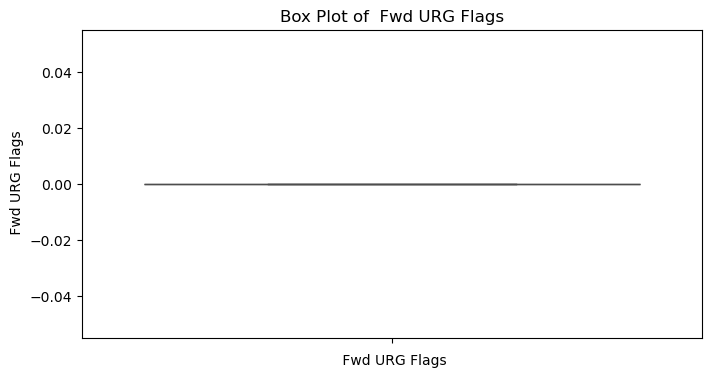

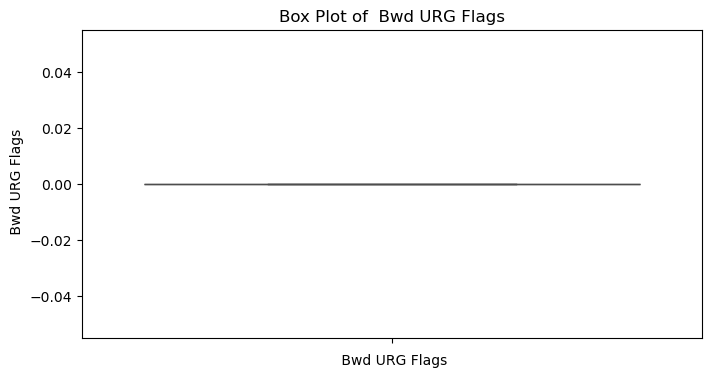

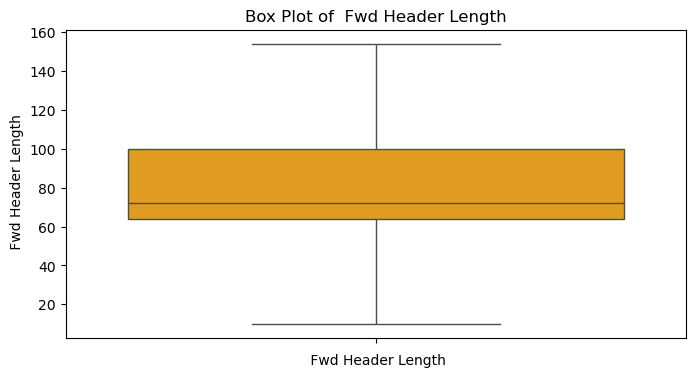

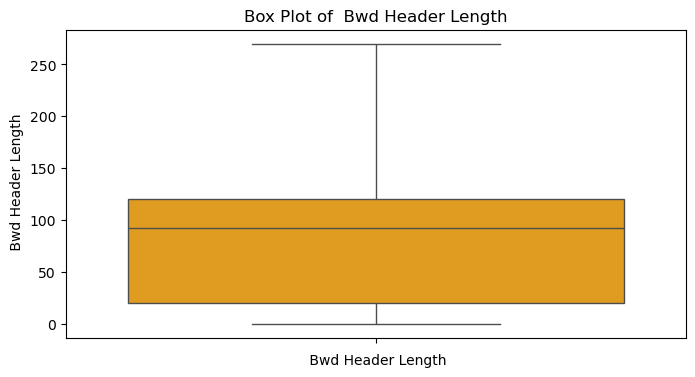

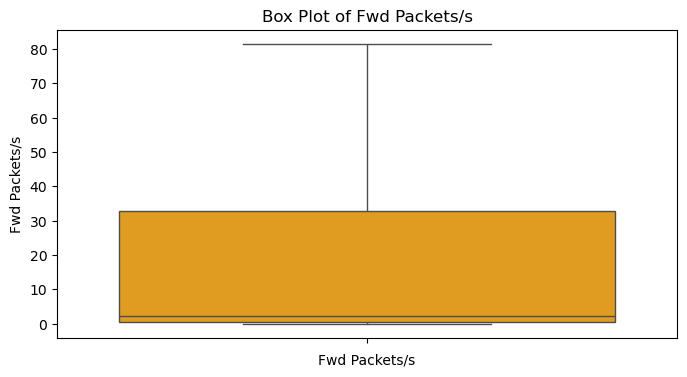

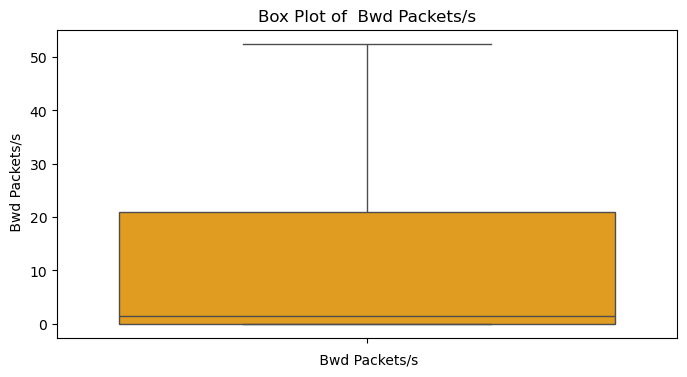

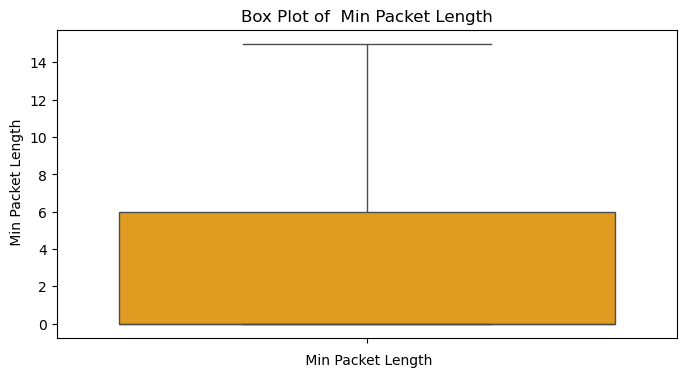

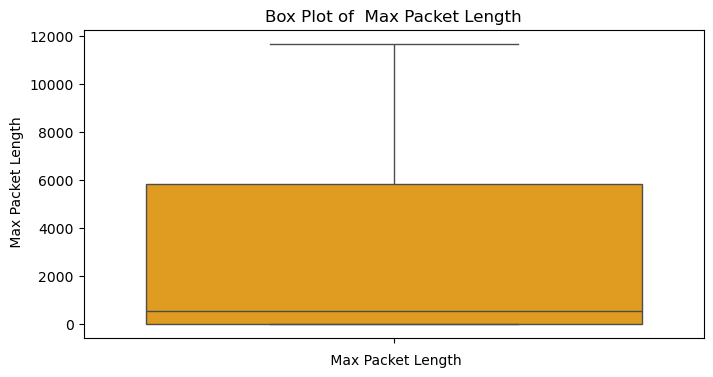

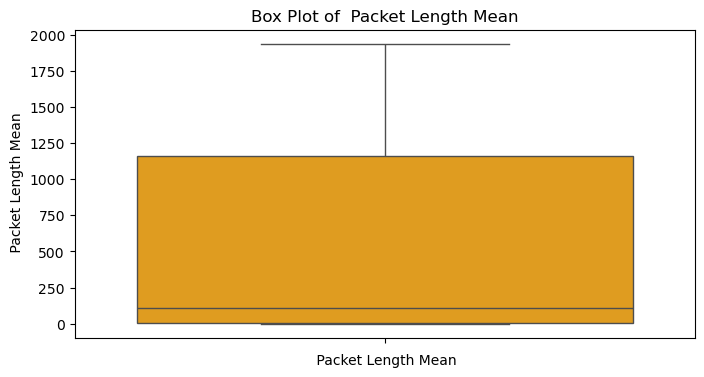

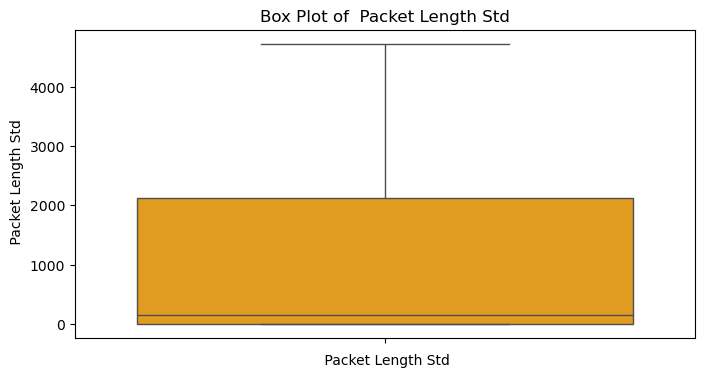

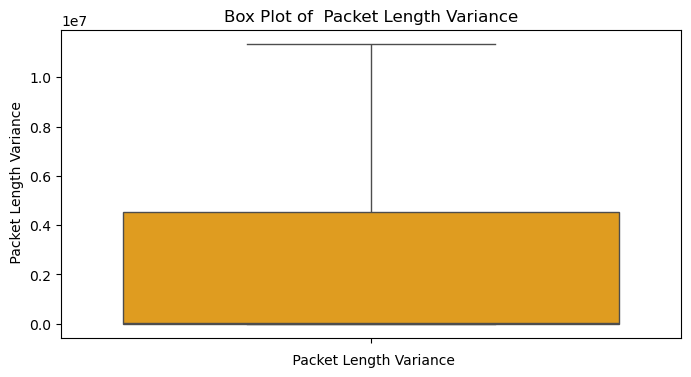

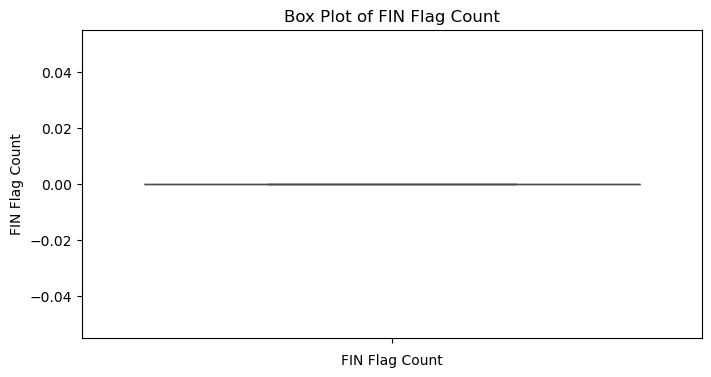

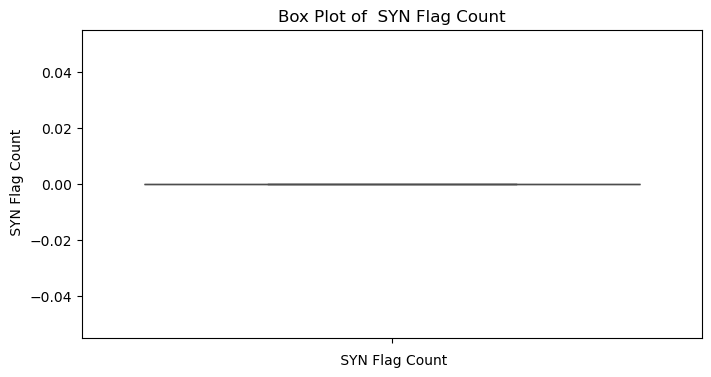

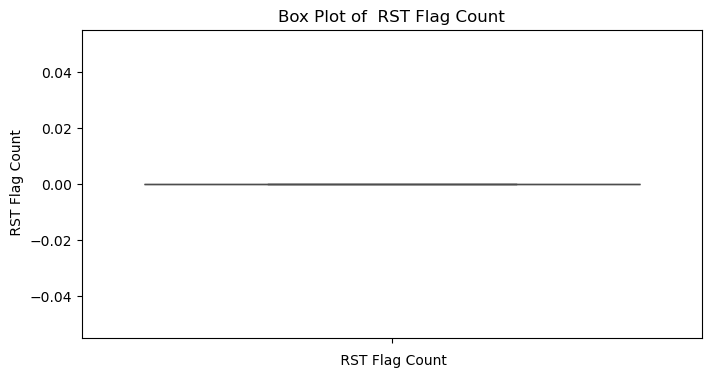

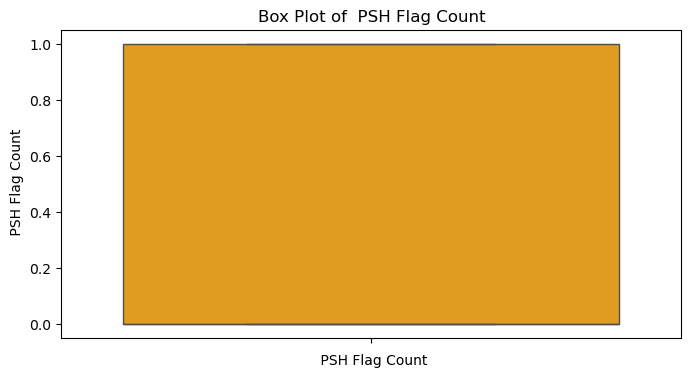

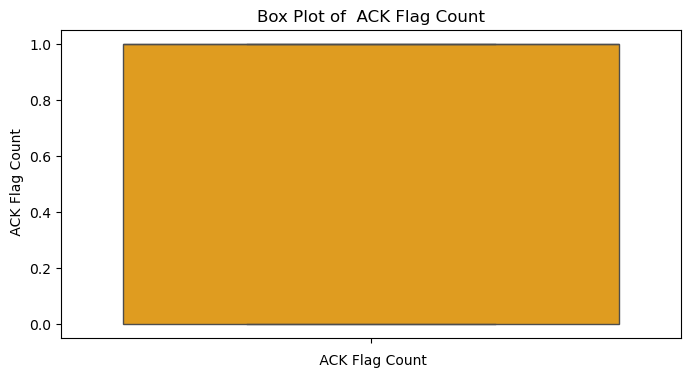

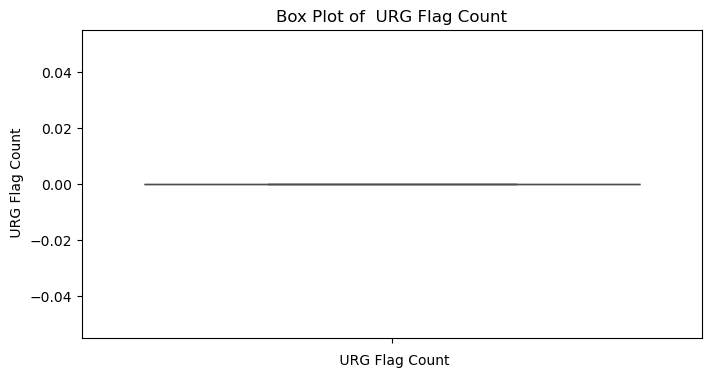

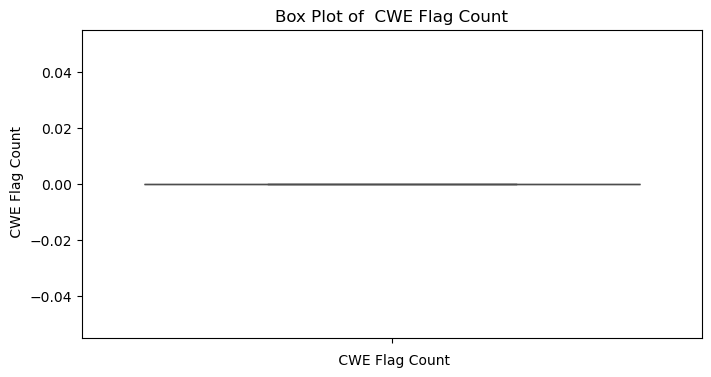

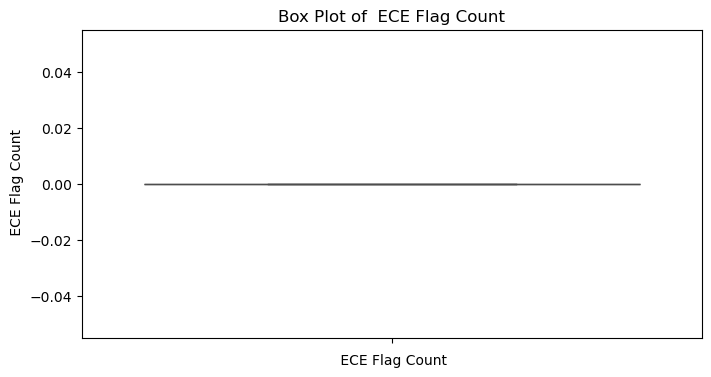

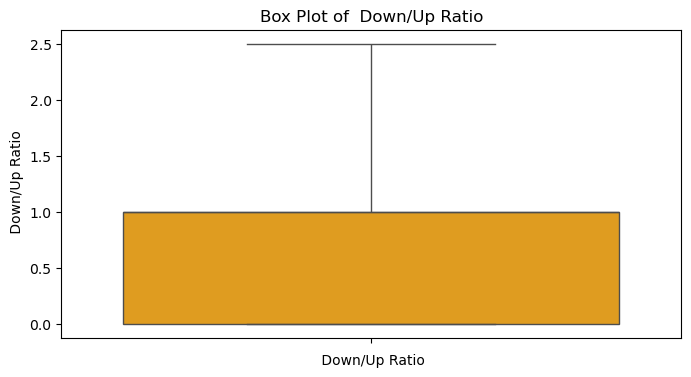

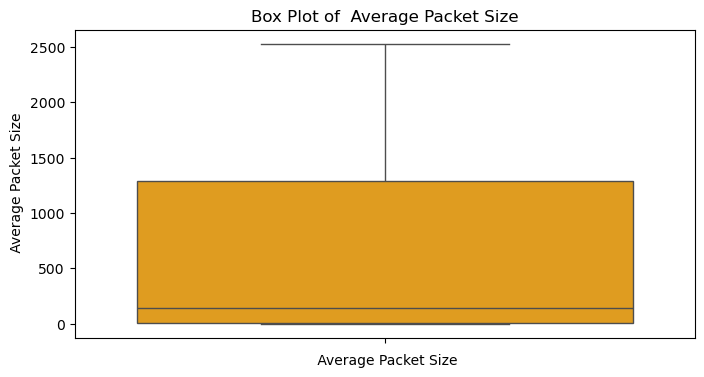

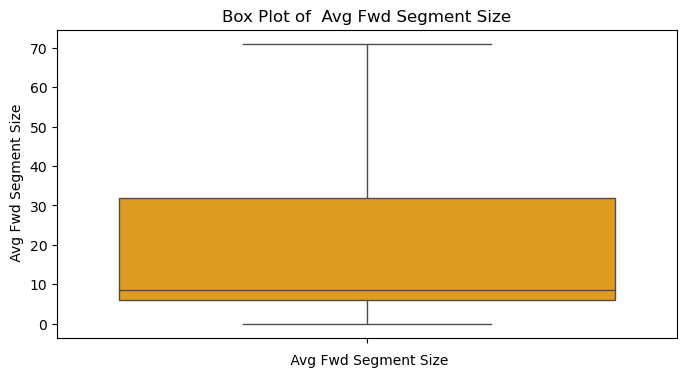

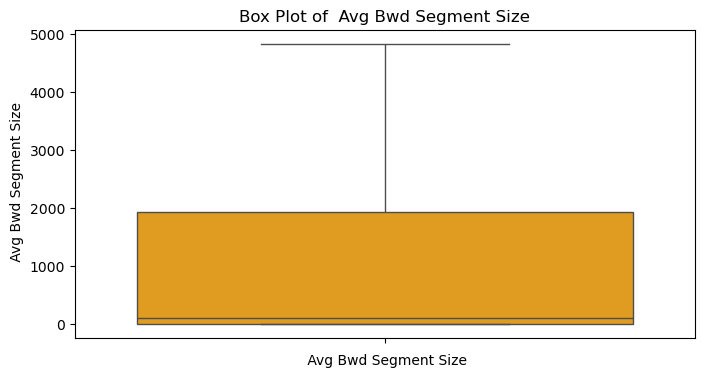

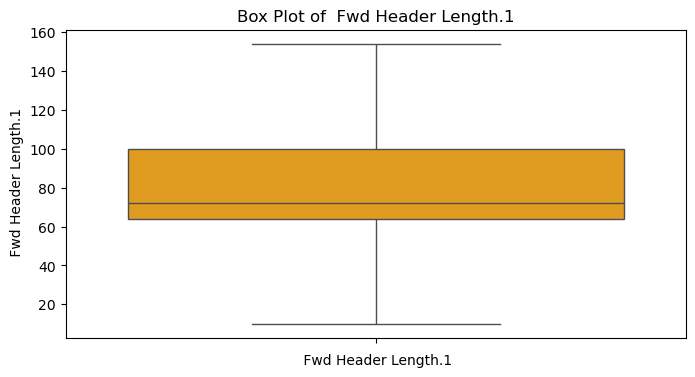

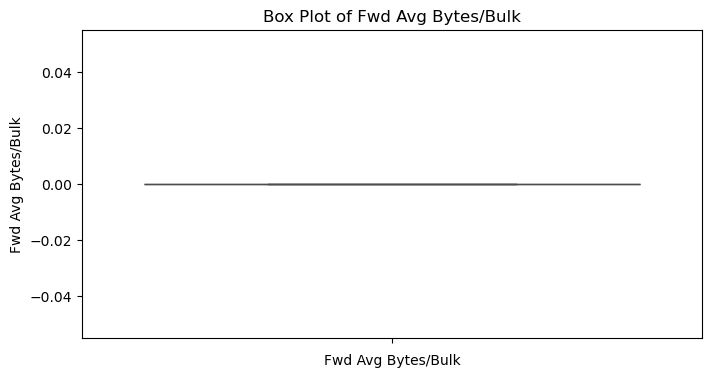

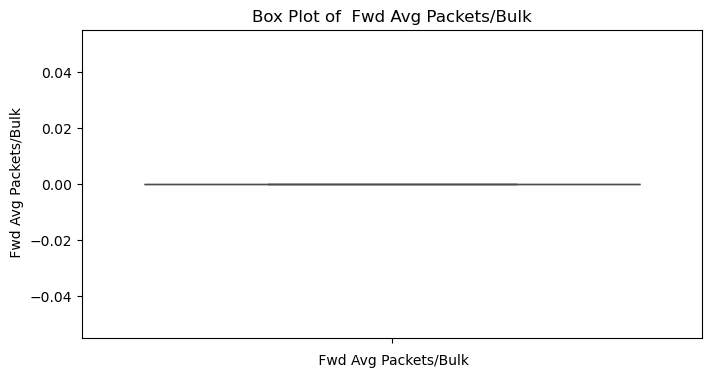

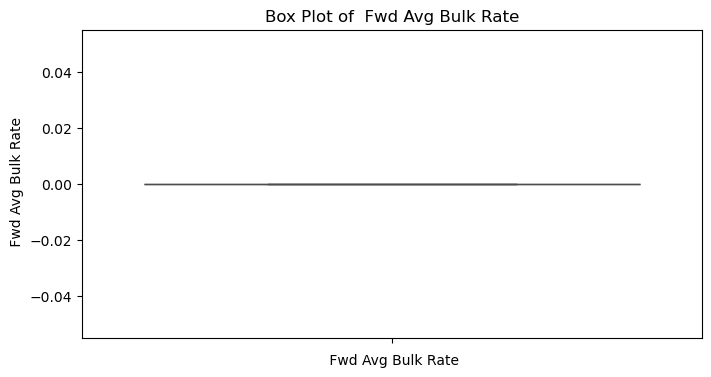

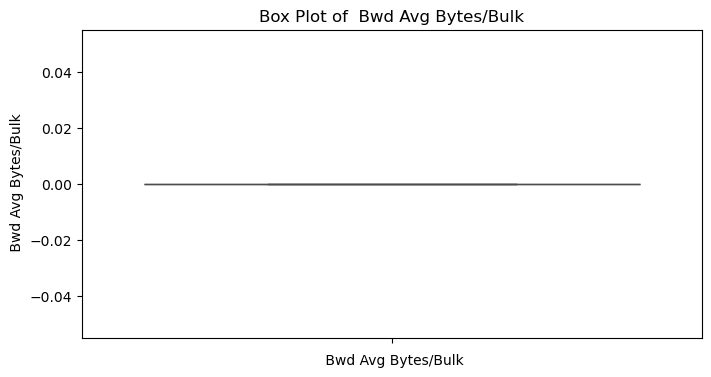

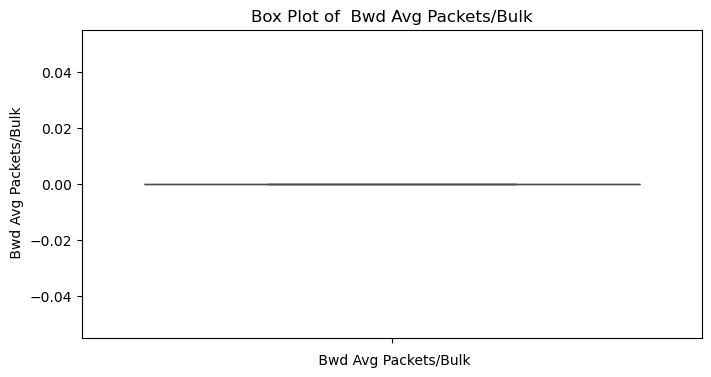

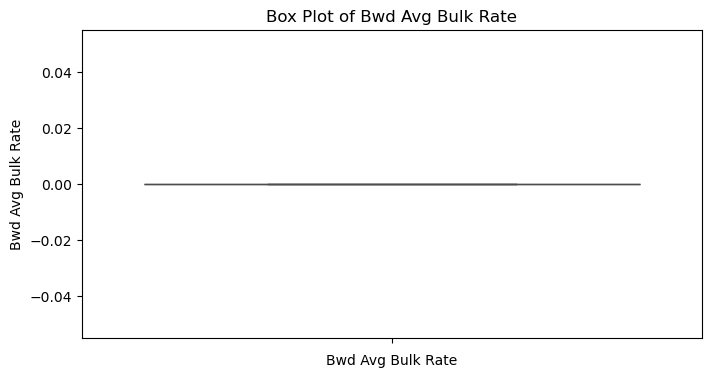

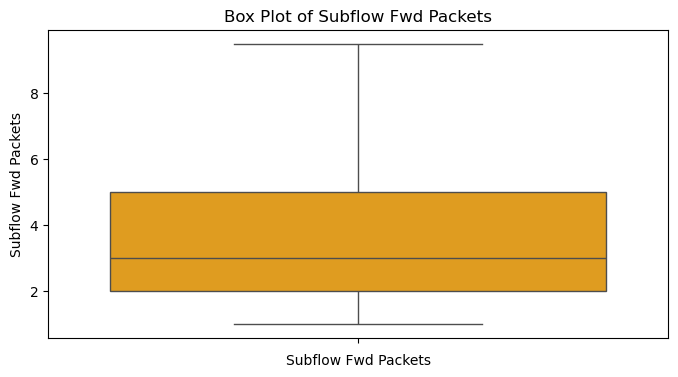

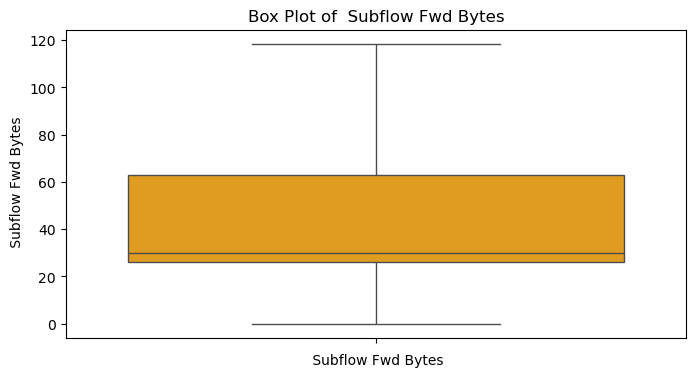

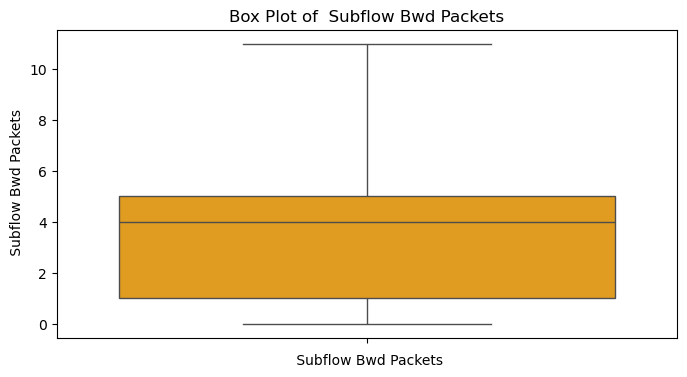

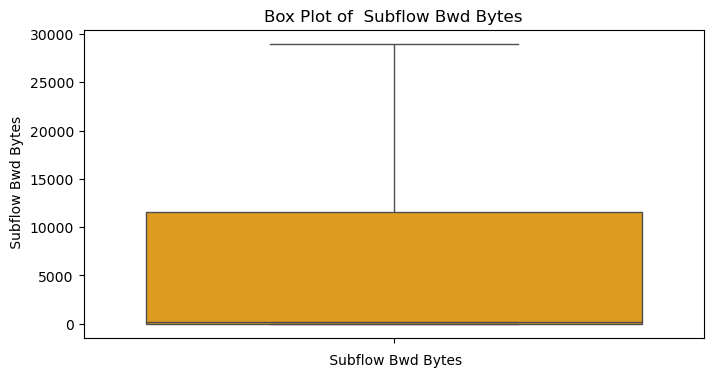

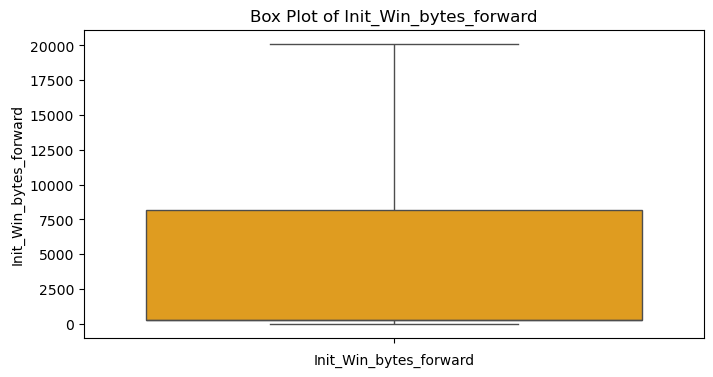

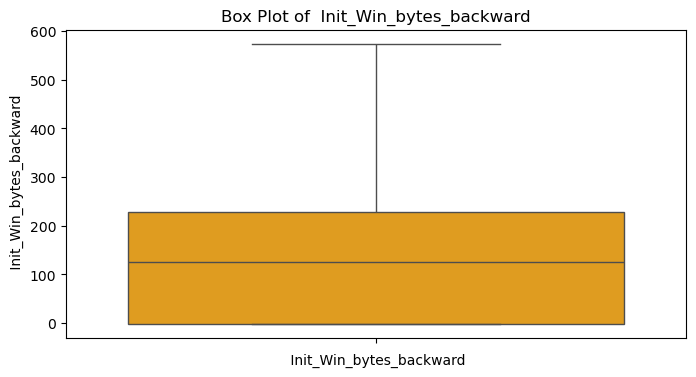

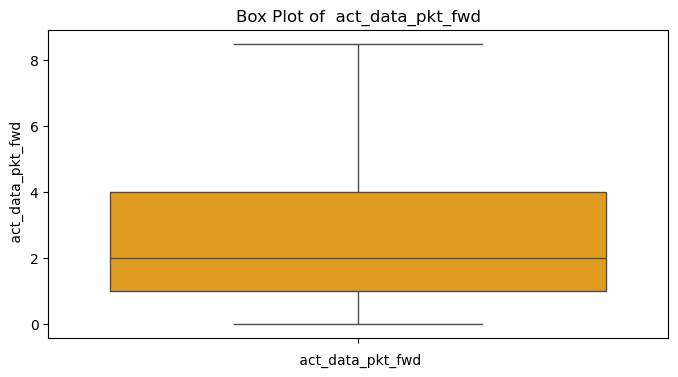

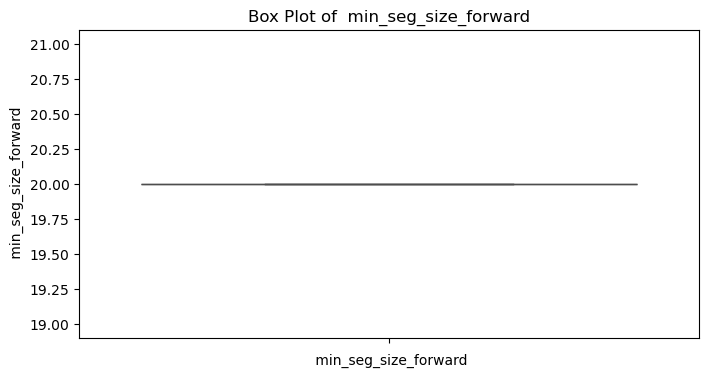

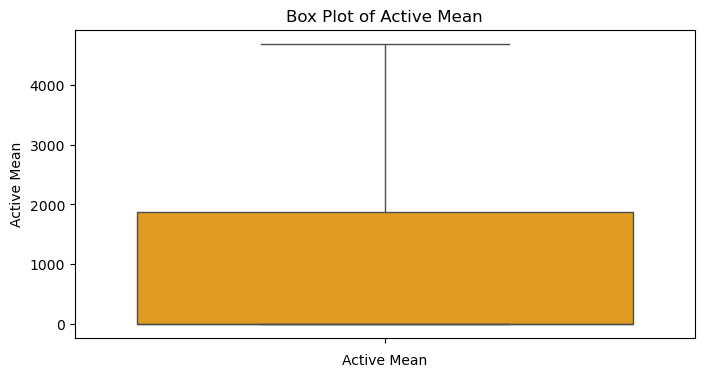

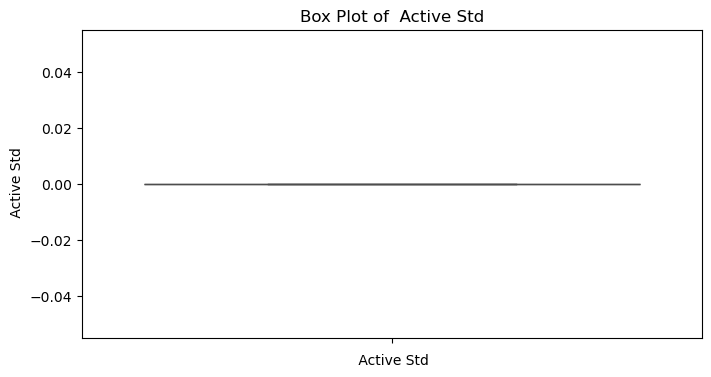

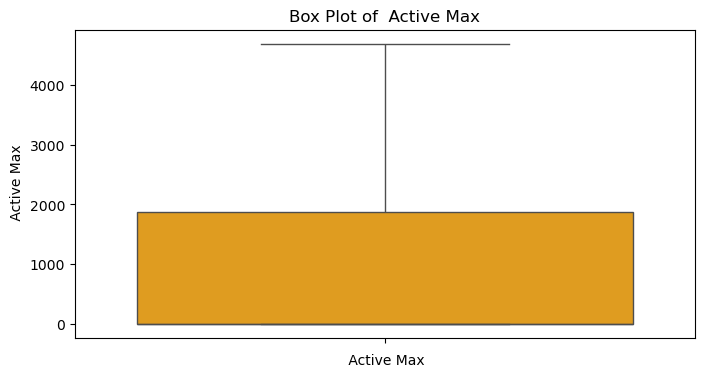

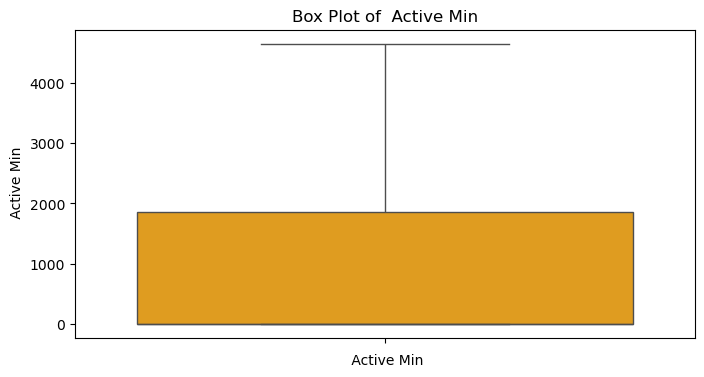

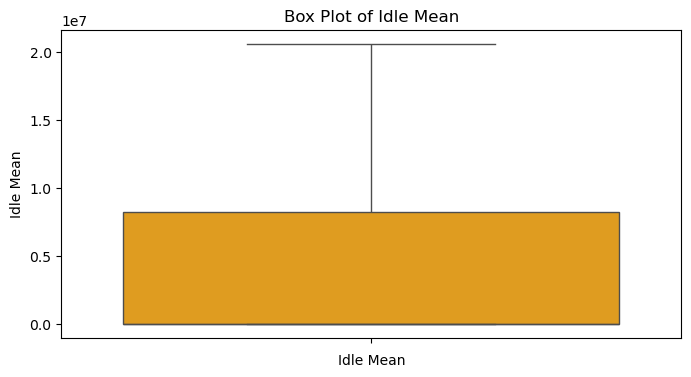

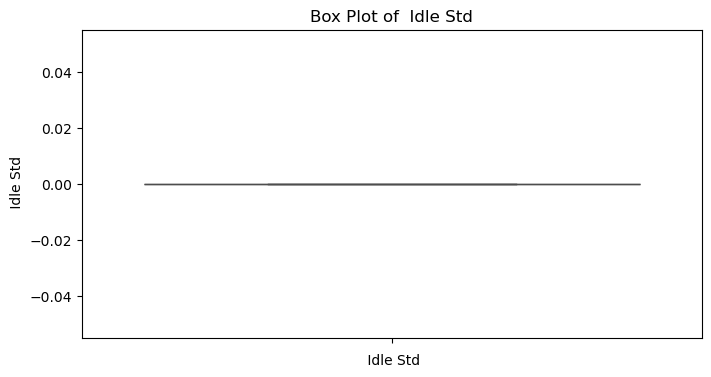

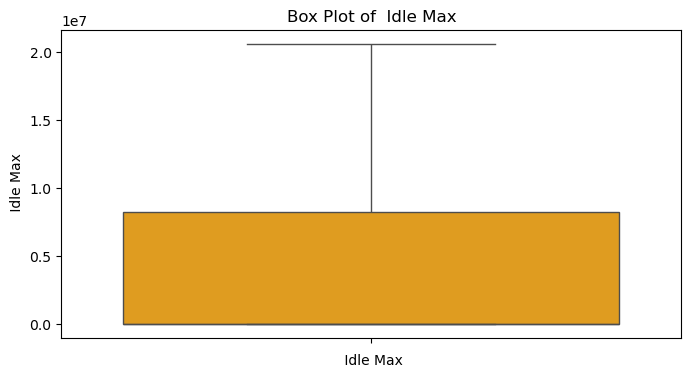

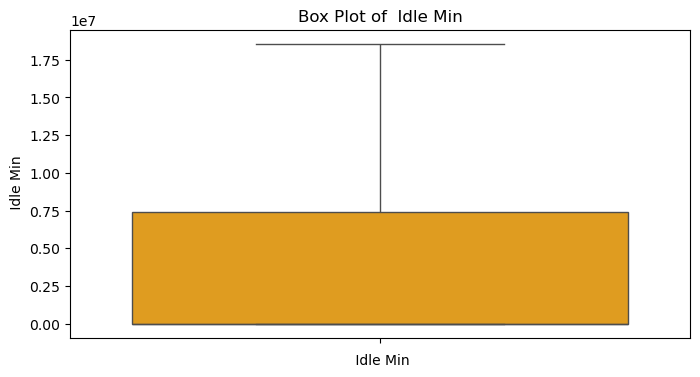

In [59]:
for feature in numerical_features:
    plt.figure(figsize=(8, 4))
    sns.boxplot(data[feature], color='orange')
    plt.title(f"Box Plot of {feature}")
    plt.xlabel(feature)
    plt.show()

### Target Variable

In [59]:
data[ ' Label'].unique()

array(['BENIGN', 'PortScan'], dtype=object)

In [61]:
#Why? Convert categorical data into numeric format for machine learning models.
le = LabelEncoder()
data[' Label'] = le.fit_transform(data[' Label'])

In [63]:
data[ ' Label'].unique()

array([0, 1])

### Heatmap Correlation

Summary Statistics:
        Destination Port   Flow Duration   Total Fwd Packets  \
count      286467.000000   286467.000000       286467.000000   
mean         4382.636244    13751.911225            1.560846   
std          5863.095210    23686.603811            0.878408   
min             0.000000      -13.000000            1.000000   
25%            80.000000       44.000000            1.000000   
50%          1110.000000       65.000000            1.000000   
75%          6881.000000    23806.000000            2.000000   
max         17082.500000    59449.000000            3.500000   

        Total Backward Packets  Total Length of Fwd Packets  \
count            286467.000000                286467.000000   
mean                  1.357811                    34.698063   
std                   0.862350                    53.055767   
min                   0.000000                     0.000000   
25%                   1.000000                     0.000000   
50%                   1.0

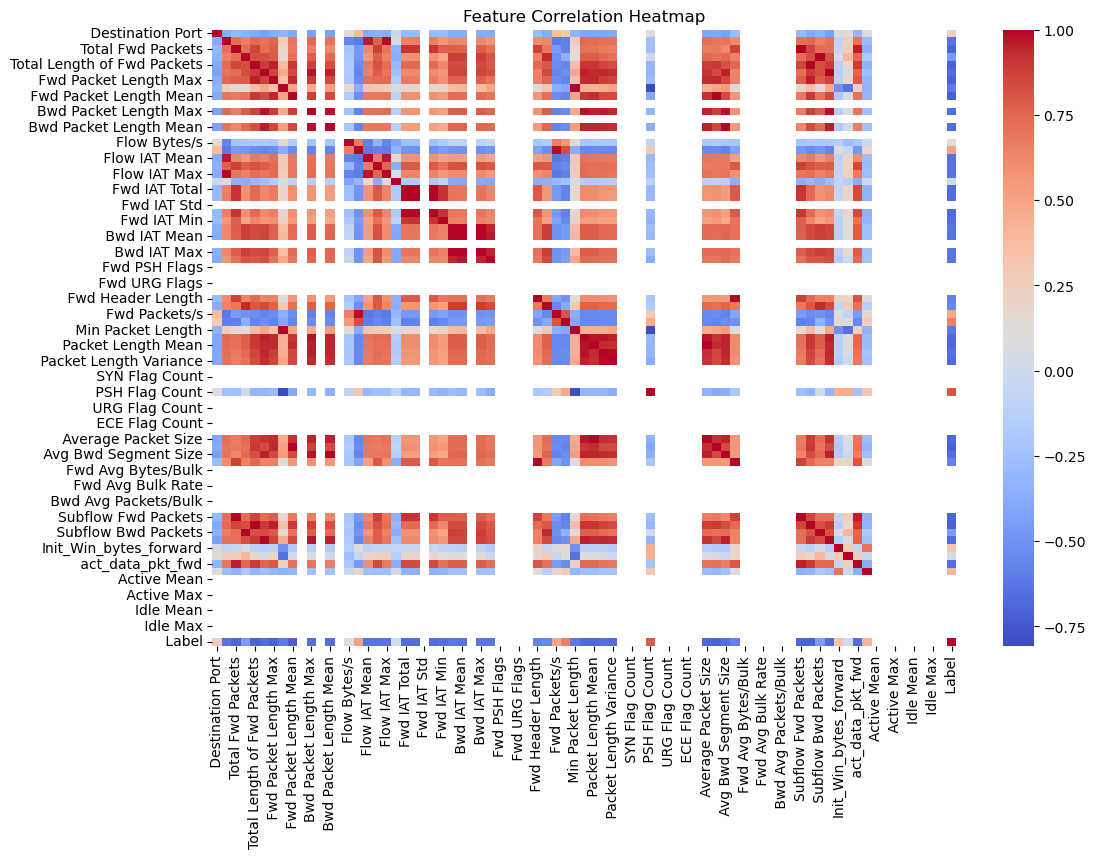

In [96]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistics
print("Summary Statistics:")
print(data.describe())

# Visualize class distribution
if 'Label' in data.columns:
    print("Class Distribution:")
    print(data['Label'].value_counts())

    plt.figure(figsize=(6, 4))
    sns.countplot(x='Label', data=data)
    plt.title("Class Distribution")
    plt.show()

# Correlation heatmap (numerical features)
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()


<Axes: xlabel=' Label', ylabel='count'>

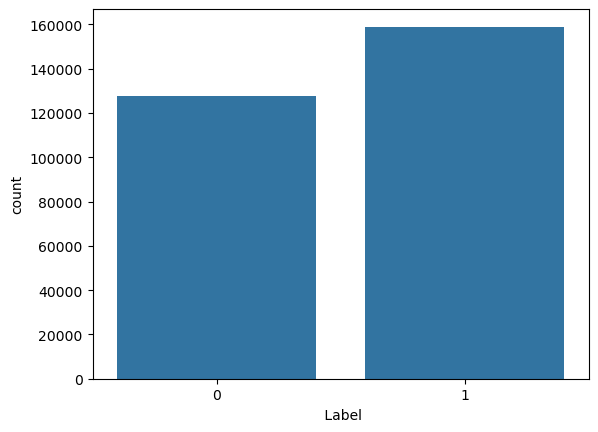

In [23]:
sns.countplot(x=data[' Label'])

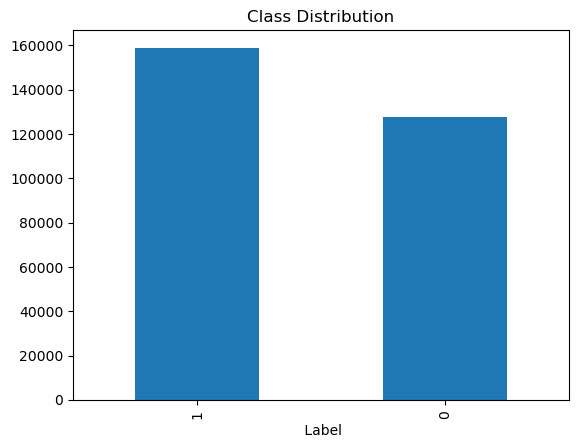

In [25]:
# Visualize class distribution
data[' Label'].value_counts().plot(kind='bar', title='Class Distribution')
plt.show()


In [27]:
print('label distribution Training Set:')
print(data[' Label'].value_counts())

label distribution Training Set:
 Label
1    158930
0    127537
Name: count, dtype: int64


In [83]:
from imblearn.over_sampling import SMOTE

# Create SMOTE object
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

# Check the class distribution after oversampling
print("Class distribution after SMOTE:", y_resampled.value_counts())


Class distribution after SMOTE:  Label
0    158930
1    158930
Name: count, dtype: int64


In [85]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)

rf_model.fit(X_train, y_train)
gbm_model.fit(X_train, y_train)
xgb_model.fit(X_train, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=30, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

In [87]:
from sklearn.metrics import classification_report, roc_auc_score

y_pred = rf_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("AUC:", roc_auc_score(y_test, rf_model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31916
           1       1.00      1.00      1.00     31656

    accuracy                           1.00     63572
   macro avg       1.00      1.00      1.00     63572
weighted avg       1.00      1.00      1.00     63572

AUC: 0.9999840156644766


In [91]:
pip install shap


   ---------------------------------------- 0.0/456.2 kB ? eta -:--:--
   ----- ---------------------------------- 61.4/456.2 kB 1.1 MB/s eta 0:00:01
   -------------------------------------- - 440.3/456.2 kB 4.6 MB/s eta 0:00:01
   ---------------------------------------- 456.2/456.2 kB 4.1 MB/s eta 0:00:00


### Splitting Data into train test Sets

In [93]:
import shap

explainer = shap.TreeExplainer(rf_model)  # Use the random forest model
shap_values = explainer.shap_values(X_selected)

# Summary plot for feature importance
shap.summary_plot(shap_values[1], X_selected)


ExplainerError: Additivity check failed in TreeExplainer! Please ensure the data matrix you passed to the explainer is the same shape that the model was trained on. If your data shape is correct then please report this on GitHub. Consider retrying with the feature_perturbation='interventional' option. This check failed because for one of the samples the sum of the SHAP values was 0.604393, while the model output was 0.920000. If this difference is acceptable you can set check_additivity=False to disable this check.

In [33]:
X = data.drop(' Label', axis=1)
y = data[' Label']

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [140]:
from imblearn.over_sampling import SMOTE
# Split into features and target
X = data.drop(columns=[' Label'])  # Replace 'Label' with your target column
y = data[' Label']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
# Use SMOTE to oversample the minority class
smote = SMOTE(random_state=42)
X_balanced, y_balanced = smote.fit_resample(X_scaled, y)

print("Class Distribution After Balancing:")
print(y_balanced.value_counts())


Class Distribution After Balancing:
 Label
0    158930
1    158930
Name: count, dtype: int64


### Training the base models

In [35]:
rf_model = RandomForestClassifier(n_estimators=100, max_depth=26, random_state=42)
gbm_model = GradientBoostingClassifier(n_estimators=100, max_depth=30, random_state=42)
xgb_model = XGBClassifier(n_estimators=100, max_depth=30, learning_rate=0.1, random_state=42)
rf_model.fit(X_train, Y_train)
gbm_model.fit(X_train, Y_train)
xgb_model.fit(X_train, y_train)


ValueError: Input X contains NaN.
GradientBoostingClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [25]:
# Initialize base classifiers
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1, random_state=42)
xgb = XGBClassifier(n_estimators=100, learning_rate=0.1, random_state=42)

# Train base models
rf.fit(X_balanced, y_balanced)
gbm.fit(X_balanced, y_balanced)
xgb.fit(X_balanced, y_balanced)


NameError: name 'X_balanced' is not defined

In [126]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [37]:
xgb_model = XGBClassifier(n_estimators=100, max_depth=30, learning_rate=0.1, random_state=42)
xgb_model.fit(X_train, Y_train)
# Stack the base classifiers
base_classifiers = [
    ('rf', rf_model),
    ('gbm', gbm_model),
    ('xgb', xgb_model)
]

# Create a stacked classifier
stacked_model = StackingClassifier(estimators=base_classifiers, final_estimator=LogisticRegression())
stacked_model.fit(X_train, Y_train)


StackingClassifier(estimators=[('rf',
                                RandomForestClassifier(max_depth=26,
                                                       random_state=42)),
                               ('gbm',
                                GradientBoostingClassifier(max_depth=30,
                                                           random_state=42)),
                               ('xgb',
                                XGBClassifier(base_score=None, booster=None,
                                              callbacks=None,
                                              colsample_bylevel=None,
                                              colsample_bynode=None,
                                              colsample_bytree=None,
                                              device=None,
                                              early_stopping_rounds=None,
                                              enable_categorical=Fals...
                                              importance_type=None,
                                              interaction_constraints=None,
                                              learning_rate=0.1, max_bin=None,
                                              max_cat_threshold=None,
                                              max_cat_to_onehot=None,
                                              max_delta_step=None, max_depth=30,
                                              max_leaves=None,
                                              min_child_weight=None,
                                              missing=nan,
                                              monotone_constraints=None,
                                              multi_strategy=None,
                                              n_estimators=100, n_jobs=None,
                                              num_parallel_tree=None,
                                              random_state=42, ...))],
                   final_estimator=LogisticRegression())

In [146]:
# Get predictions for training data
base_predictions = np.column_stack((rf.predict(X_train), gbm.predict(X_train), xgb.predict(X_train)))

# Train meta-classifier
meta_classifier = LogisticRegression()
meta_classifier.fit(base_predictions, y_train)

C:\Users\yashs\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but RandomForestClassifier was fitted without feature names
  warnings.warn(
C:\Users\yashs\anaconda3\Lib\site-packages\sklearn\base.py:486: UserWarning: X has feature names, but GradientBoostingClassifier was fitted without feature names
  warnings.warn(


LogisticRegression()

In [43]:
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Predictions
y_pred = stacked_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, y_pred)

# Classification report
report = classification_report(Y_test, y_pred)

# AUC Score
auc = roc_auc_score(Y_test, stacked_model.predict_proba(X_test)[:,1])

print(f'Accuracy: {accuracy}')
print(f'Classification Report: \n{report}')
print(f'AUC: {auc}')


Accuracy: 0.9998952769923553
Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     25532
           1       1.00      1.00      1.00     31762

    accuracy                           1.00     57294
   macro avg       1.00      1.00      1.00     57294
weighted avg       1.00      1.00      1.00     57294

AUC: 0.9999995135319408


In [51]:
from sklearn.metrics import accuracy_score

# Random Forest
y_pred_rf = rf_model.predict(X_test)  # Replace 'rf_model' with your Random Forest model object
accuracy_rf = accuracy_score(Y_test, y_pred_rf)

# Gradient Boosting Machine
y_pred_gbm = gbm_model.predict(X_test)  # Replace 'gbm_model' with your GBM model object
accuracy_gbm = accuracy_score(Y_test, y_pred_gbm)

# XGBoost
y_pred_xgb = xgb_model.predict(X_test)  # Replace 'xgb_model' with your XGBoost model object
accuracy_xgb = accuracy_score(Y_test, y_pred_xgb)

# Stacked Model
y_pred_stacked = stacked_model.predict(X_test)  # Replace 'stacked_model' with your stacked model object
accuracy_stacked = accuracy_score(Y_test, y_pred_stacked)


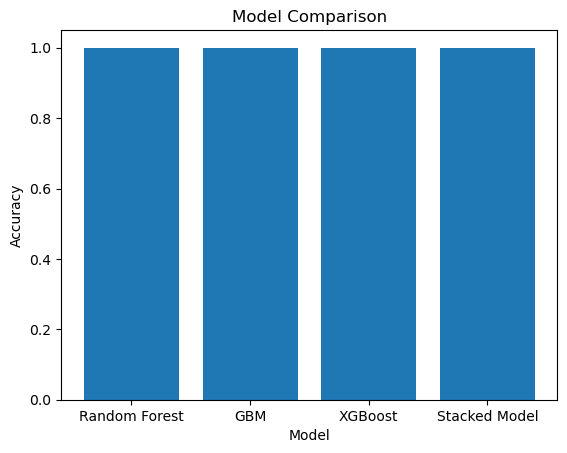

In [53]:
import matplotlib.pyplot as plt

models = ['Random Forest', 'GBM', 'XGBoost', 'Stacked Model']
accuracies = [accuracy_rf, accuracy_gbm, accuracy_xgb, accuracy]

plt.bar(models, accuracies)
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Model Comparison')
plt.show()


In [42]:

from sklearn.model_selection import GridSearchCV 

param_grid = {'n_estimators': [50, 100, 150]}
grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'n_estimators': 150}


In [44]:
import joblib
joblib.dump(meta_classifier, 'stacked_ensemble.pkl')


['stacked_ensemble.pkl']

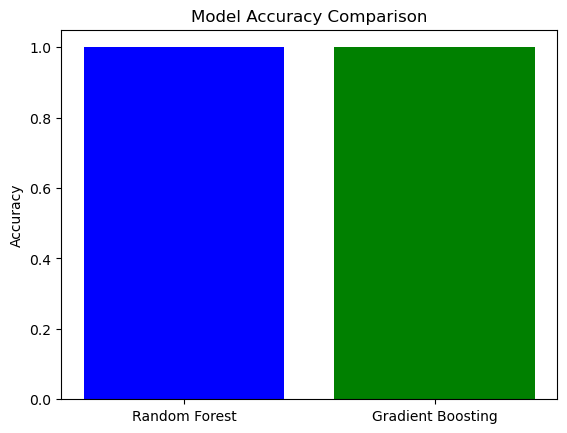

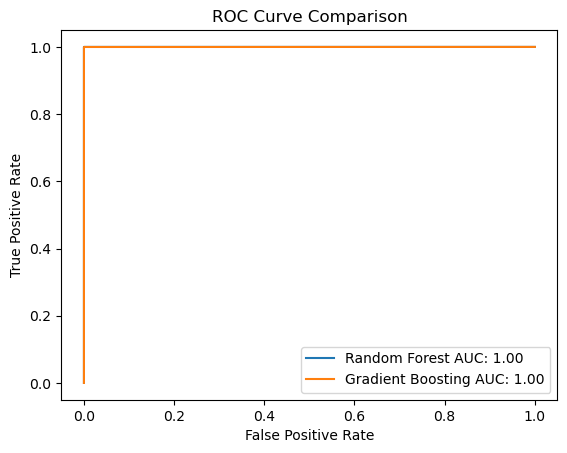

In [69]:

# Data Preprocessing
X = data.iloc[:, :-1]  # Features
y = data.iloc[:, -1]   # Target
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Models
rf = RandomForestClassifier(n_estimators=100, random_state=42)
gbm = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Fit and Predict
rf.fit(X_train, y_train)
gbm.fit(X_train, y_train)
rf_preds = rf.predict(X_test)
gbm_preds = gbm.predict(X_test)

# Accuracy Graph
models = ['Random Forest', 'Gradient Boosting']
accuracies = [accuracy_score(y_test, rf_preds), accuracy_score(y_test, gbm_preds)]
plt.bar(models, accuracies, color=['blue', 'green'])
plt.title('Model Accuracy Comparison')
plt.ylabel('Accuracy')
plt.show()

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, rf.predict_proba(X_test)[:, 1])
fpr_gbm, tpr_gbm, _ = roc_curve(y_test, gbm.predict_proba(X_test)[:, 1])
plt.plot(fpr_rf, tpr_rf, label='Random Forest AUC: {:.2f}'.format(auc(fpr_rf, tpr_rf)))
plt.plot(fpr_gbm, tpr_gbm, label='Gradient Boosting AUC: {:.2f}'.format(auc(fpr_gbm, tpr_gbm)))
plt.title('ROC Curve Comparison')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()


In [100]:
# Define base classifiers with some common choices for anomaly detection
base_classifiers = [
    ('rf', RandomForestClassifier(n_estimators=100, random_state=42)),
    ('gb', GradientBoostingClassifier(n_estimators=100, random_state=42)),
    ('svc', SVC(probability=True, random_state=42)),
    ('knn', KNeighborsClassifier(n_neighbors=5))
]

In [102]:
# Define the meta-classifier
meta_classifier = LogisticRegression()

# Create the stacking model using the base classifiers and meta-classifier
stacked_model = StackingClassifier(
    estimators=base_classifiers,
    final_estimator=meta_classifier,
    cv=5  # cross-validation folds
)

In [ ]:
# Train the stacking model on the training data
stacked_model.fit(X_train, y_train)


In [ ]:
# Make predictions on the test set
y_pred = stacked_model.predict(X_test)

# Evaluate the model performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))